# 1. Скачайте тренировочный датасет. Распакуйте один файл и посмотрите на его структуру.

In [1]:
import pandas as pd
import dill as dill
import numpy as np
import matplotlib.pyplot as plt
import warnings

from os import listdir
from os.path import isfile, join

from sklearn.pipeline import Pipeline, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm.sklearn import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.base import TransformerMixin, BaseEstimator
from plot_metric.functions import BinaryClassification


from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_auc_score

warnings.filterwarnings("ignore")

In [2]:
df0 = pd.read_parquet('train_data/train_data_0.pq')

In [3]:
df0

,id,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,...,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag
0,0,1,18,9,2,3,16,10,11,3,...,3,3,3,4,1,3,4,1,0,0
1,0,2,18,9,14,14,12,12,0,3,...,0,0,0,4,1,3,4,1,0,0
2,0,3,18,9,4,8,1,11,11,0,...,0,0,0,4,1,2,3,1,1,1
3,0,4,4,1,9,12,16,7,12,2,...,3,3,3,4,1,3,1,1,0,0
4,0,5,5,12,15,2,11,12,10,2,...,3,3,3,4,1,3,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1974719,249998,4,1,9,14,8,10,11,8,4,...,3,3,3,4,1,2,3,1,0,1
1974720,249998,5,7,9,4,8,1,11,19,1,...,3,3,3,4,1,2,4,1,1,1
1974721,249999,1,9,0,10,8,10,11,16,2,...,3,3,3,4,1,2,3,1,0,1
1974722,249999,2,9,16,10,13,10,4,12,2,...,3,3,3,4,1,2,3,1,0,0


In [4]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1974724 entries, 0 to 1974723
Data columns (total 61 columns):
 #   Column                         Dtype
---  ------                         -----
 0   id                             int64
 1   rn                             int64
 2   pre_since_opened               int64
 3   pre_since_confirmed            int64
 4   pre_pterm                      int64
 5   pre_fterm                      int64
 6   pre_till_pclose                int64
 7   pre_till_fclose                int64
 8   pre_loans_credit_limit         int64
 9   pre_loans_next_pay_summ        int64
 10  pre_loans_outstanding          int64
 11  pre_loans_total_overdue        int64
 12  pre_loans_max_overdue_sum      int64
 13  pre_loans_credit_cost_rate     int64
 14  pre_loans5                     int64
 15  pre_loans530                   int64
 16  pre_loans3060                  int64
 17  pre_loans6090                  int64
 18  pre_loans90                    int64
 19  

In [5]:
# Код обработки данных не нужен так для обработки данных будут использоваться свои функции
# Датасет загружен, его структура изучена

# 2. Подумайте, какие признаки могут быть полезны, и смоделируйте их. Дайте комментарии, почему вы сгенерировали тот или иной признак.

In [6]:
# Список признаков

In [7]:
# Рассмотрим распределение значений в каждом признаке

In [8]:
# количество дней с даты открытия до даты сбора данных

In [9]:
df0['pre_since_opened'].value_counts()

18    159072
6     154230
13    141904
4     138266
8     133032
0     111331
7      96090
19     94237
2      91807
10     91017
9      90118
17     86449
1      85775
11     82871
3      82231
5      80730
14     78560
15     73219
12     71609
16     32176
Name: pre_since_opened, dtype: int64

In [10]:
# количество дней с даты подтверждения информации по кредиту до даты сбора данных

In [11]:
df0['pre_since_confirmed'].value_counts()

9     418663
6     169181
14    134266
3     123579
17    116876
4     106465
8     101021
7      99650
13     84393
10     83769
0      80598
12     79820
2      77607
1      76836
16     75548
5      74440
11     71962
15        50
Name: pre_since_confirmed, dtype: int64

In [12]:
# плановое количество дней с даты открытия кредита до даты закрытия

In [13]:
df0['pre_pterm'].value_counts()

4     374796
14    152466
7     126906
2     121765
16    110465
17    109905
8     109871
9     109775
1     108185
13    105364
15    102845
11     94518
12     90278
6      83052
0      77813
3      69856
10     26840
5         24
Name: pre_pterm, dtype: int64

In [14]:
# фактическое количество дней с даты открытия кредита до даты закрытия

In [15]:
df0['pre_fterm'].value_counts()

8     456464
6     143317
9     130091
0     121794
16    117232
14    109091
10    102163
15    101928
2     101462
11     99467
5      95052
13     94235
7      92802
1      73995
12     71667
3      63956
4          8
Name: pre_fterm, dtype: int64

In [16]:
# плановое количество дней с даты сбора данных до даты закрытия кредита

In [17]:
df0['pre_till_pclose'].value_counts()

1     425301
3     123474
5     116484
13    116437
12    114776
9     105241
8     103823
16    102066
6      97851
11     97682
15     96869
2      93776
14     87246
10     83751
7      76321
0      75752
4      57874
Name: pre_till_pclose, dtype: int64

In [18]:
# фактическое количество дней с даты сбора данных до даты закрытия кредита

In [19]:
df0['pre_till_fclose'].value_counts()

11    527331
10    136524
5     132307
3     111730
7     110329
1     103103
8      99128
6      98125
13     97367
12     95877
14     95296
0      95036
15     91104
4      86663
9      55750
2      39054
Name: pre_till_fclose, dtype: int64

In [20]:
# кредитный лимит

In [21]:
df0['pre_loans_credit_limit'].value_counts()

14    134518
19    116963
10    112585
12    112024
3     109933
1     109169
11    106627
17    105715
16    105116
7     105097
8     103617
13    100302
5      96205
0      95755
15     95730
6      88776
2      85575
18     79187
4      70431
9      41399
Name: pre_loans_credit_limit, dtype: int64

In [22]:
# сумма следующего платежа по кредиту

In [23]:
df0['pre_loans_next_pay_summ'].value_counts()

2    1254609
1     131823
4     126847
3     124048
6     120904
0     117885
5      98608
Name: pre_loans_next_pay_summ, dtype: int64

In [24]:
# оставшаяся невыплаченная сумма кредита

In [25]:
df0['pre_loans_outstanding'].value_counts()

3    1583256
4     107113
2     106912
5      95065
1      82378
Name: pre_loans_outstanding, dtype: int64

In [26]:
# текущая просроченная задолженность

In [27]:
df0['pre_loans_total_overdue'].value_counts()

0    1974724
Name: pre_loans_total_overdue, dtype: int64

In [28]:
# максимальная просроченная задолженность

In [29]:
df0['pre_loans_max_overdue_sum'].value_counts()

2    1753063
3     122792
1      98869
Name: pre_loans_max_overdue_sum, dtype: int64

In [30]:
# полная стоимость кредита

In [31]:
df0['pre_loans_credit_cost_rate'].value_counts()

4     617285
2     401499
5     134815
3     132565
9     113663
7     110147
1     105292
0      79358
13     76626
11     69577
8      65287
6      34603
10     33994
12        13
Name: pre_loans_credit_cost_rate, dtype: int64

In [32]:
# число просрочек до 5 дней

In [33]:
df0['pre_loans5'].value_counts() # признаки pre_loans похожи друг на друга. рассмотрим только один из этой группы

6     1966583
0        6048
3        1496
5         443
2         113
16         34
13          6
7           1
Name: pre_loans5, dtype: int64

In [34]:
# нет просрочек до 5 дней

In [35]:
df0['is_zero_loans5'].value_counts() # признаки is_zero_loans похожи друг на друга. рассмотрим только один из этой группы

1    1786965
0     187759
Name: is_zero_loans5, dtype: int64

In [36]:
# отношение оставшейся невыплаченной суммы кредита к кредитному лимиту

In [37]:
df0['pre_util'].value_counts()

16    1428555
9      106994
3       68910
18      44641
6       38869
11      34066
15      28758
1       24993
7       21820
10      20879
12      20412
4       20137
0       20069
19      18706
8       18690
13      18123
2       17967
5       17701
17       2915
14       1519
Name: pre_util, dtype: int64

In [38]:
# отношение текущей просроченной задолженности к кредитному лимиту

In [39]:
df0['pre_over2limit'].value_counts()

2     1868715
5      103161
17       1550
15        285
6         196
8         109
14         86
4          66
3          60
10         58
11         53
13         52
1          52
16         48
19         46
18         45
0          37
12         36
7          35
9          34
Name: pre_over2limit, dtype: int64

In [40]:
# отношение максимальной просроченной задолженности к кредитному лимиту

In [41]:
df0['pre_maxover2limit'].value_counts()

17    1761622
4      103745
3       69837
0       19365
11       8414
5        2937
15       2694
9        1427
8         764
14        585
12        551
16        444
2         396
10        375
7         340
19        332
1         327
13        300
18        152
6         117
Name: pre_maxover2limit, dtype: int64

In [42]:
# флаг: отношение оставшейся невыплаченной суммы кредита к кредитному лимиту равно 0

In [43]:
df0['is_zero_util'].value_counts()

1    1404635
0     570089
Name: is_zero_util, dtype: int64

In [44]:
# флаг: отношение текущей просроченной задолженности к кредитному лимиту равно 0

In [45]:
df0['is_zero_over2limit'].value_counts()

1    1862809
0     111915
Name: is_zero_over2limit, dtype: int64

In [46]:
# флаг: отношение максимальной просроченной задолженности к кредитному лимиту равно 0

In [47]:
df0['is_zero_maxover2limit'].value_counts()

1    1651085
0     323639
Name: is_zero_maxover2limit, dtype: int64

In [48]:
# статусы ежемесячных платежей за последние N месяцев

In [49]:
df0['enc_paym_1'].value_counts() # признаки is_zero_loans похожи друг на друга. рассмотрим только один из этой группы

0    1635644
3     205080
1     124300
2       9700
Name: enc_paym_1, dtype: int64

In [50]:
# тип отношения к кредиту

In [51]:
df0['enc_loans_account_holder_type'].value_counts()

1    1953308
3      12090
4       7596
6       1371
2        259
5         89
0         11
Name: enc_loans_account_holder_type, dtype: int64

In [52]:
# статус кредита

In [53]:
df0['enc_loans_credit_status'].value_counts()

3    1345137
2     613369
4       7901
5       4775
1       3193
0        206
6        143
Name: enc_loans_credit_status, dtype: int64

In [54]:
# валюта кредита

In [55]:
df0['enc_loans_account_cur'].value_counts()

1    1967880
2       5746
0       1077
3         21
Name: enc_loans_account_cur, dtype: int64

In [56]:
# тип кредита

In [57]:
df0['enc_loans_credit_type'].value_counts()

4    1094183
3     556556
1     169119
5      61384
2      50329
0      43153
Name: enc_loans_credit_type, dtype: int64

In [58]:
# плановое количество дней с даты открытия кредита до даты закрытия не определено

In [59]:
df0['pclose_flag'].value_counts()

0    1634798
1     339926
Name: pclose_flag, dtype: int64

In [60]:
# флаг: фактическое количество дней с даты открытия кредита до даты закрытия не определено

In [61]:
df0['fclose_flag'].value_counts()

0    1532517
1     442207
Name: fclose_flag, dtype: int64

In [62]:
'''Все признаки закодированы и сложно анализируемы.
1) В текущем виде датасет невозможно обучить, так как у одного id клиента может быть множество кредитов.
2) Все признаки по сути являются категориальыми, поэтому будем кодировать датасет Ohe и агрегировать по сумме - таким образом
данные сохранятся лучше всего.
3) Признак pre_loans_total_overdue - все значения = 0. Для модели бесполезный признак (подлежит удалению)
4) Признак rn необходимо агрегировать по count, таким образом получим количесвто кредитов у одного id
5) С помощью is_zero_util можно определить количество закрытых кредитов
Создадим фичу количество открытых кредитов open_loans, если is_zero_util = 0, значит кредит не закрыт
6) Инвертируем значения признаков is_zero_loans - так как нам важно наличие именно просрочек, а не их отсутсвие
7) Из признака pre_loans_credit_limit можно создать фичу growth_limit - увеличился ли кредитный лимит по сравнению
с первым кредитом?'''

'Все признаки закодированы и сложно анализируемы.\n1) В текущем виде датасет невозможно обучить, так как у одного id клиента может быть множество кредитов.\n2) Все признаки по сути являются категориальыми, поэтому будем кодировать датасет Ohe и агрегировать по сумме - таким образом\nданные сохранятся лучше всего.\n3) Признак pre_loans_total_overdue - все значения = 0. Для модели бесполезный признак (подлежит удалению)\n4) Признак rn необходимо агрегировать по count, таким образом получим количесвто кредитов у одного id\n5) С помощью is_zero_util можно определить количество закрытых кредитов\nСоздадим фичу количество открытых кредитов open_loans, если is_zero_util = 0, значит кредит не закрыт\n6) Инвертируем значения признаков is_zero_loans - так как нам важно наличие именно просрочек, а не их отсутсвие\n7) Из признака pre_loans_credit_limit можно создать фичу growth_limit - увеличился ли кредитный лимит по сравнению\nс первым кредитом?'

In [63]:
# Создадим вспомогательные функции сохранения - загрузки моделей

In [10]:
def dill_dump(path, model):
    with open(path, 'wb') as file:
        dill.dump(model, file)

def dill_load(path):
    with open(path, 'rb') as file:
        model = dill.load(file)
    return model

In [11]:
# для экономии памяти создадим функцию кодирования ohe + агрегирования по 1 признаку

In [12]:
def convert_one_features(df0=pd.DataFrame, column=str, col_id=False) -> pd.DataFrame:
    df_col = df0[['id', column]]
    ohe = OneHotEncoder(sparse=False)
    df_col[ohe.get_feature_names_out()] = ohe.fit_transform(df_col[[column]])
    df_col = df_col.drop(columns=column)
    df_col = df_col.groupby(['id']).agg('sum').reset_index()
    if col_id == False:
        df_col = df_col.drop(columns='id')
    return df_col

In [13]:
# Функция агрегирования rn по count (получим в итоговом датасете количество кредитов на один id)

In [14]:
def agg_rn(df=pd.DataFrame) -> pd.DataFrame:
    df_agg_rn = df[['id', 'rn']].copy()
    df_agg_rn = df_agg_rn.groupby(['id']).agg('count').reset_index()
    return df_agg_rn

In [15]:
# Функция для удаления признака

In [16]:
def del_feature(df=pd.DataFrame, col=str) -> pd.DataFrame:
    df_new = df.copy()
    return df_new.drop(columns=col)

In [17]:
# Функция для инвертирования признаков

In [18]:
def invert(df=pd.DataFrame, columns=list, col_id=False) -> pd.DataFrame: 
    df_invert = df[['id'] + columns].copy()
    for col in columns:
        df_invert[col] = df_invert[col].apply(lambda x: 1 if x==0 else 0) #делаем реверс значений по каждой колонке
    if col_id == False:
        return df_invert.drop(columns='id')
    else:
        return df_invert

In [19]:
# Функция для получения признака - количество открытых кредитов

In [20]:
def open_loans_credit(df=pd.DataFrame) -> pd.Series:
    df_open = df[['id', 'is_zero_util']].copy()
    df_open = invert(df_open, ['is_zero_util'], col_id=True)
    df_open = df_open.groupby(['id']).agg('sum').reset_index()
    df_open = df_open.rename(columns={'is_zero_util':'open_loans'})
    return df_open['open_loans']

In [21]:
# Функция для получения growth_limit - увеличился ли кредитный лимит по сравнению с первым кредитом

In [22]:
def growth_limit_feature(df=pd.DataFrame) -> pd.Series:
    df_change = df[['id', 'pre_loans_credit_limit']].copy()
    df_change_first = df_change.drop_duplicates(subset=['id'], keep='first').rename(columns={
        'pre_loans_credit_limit': 'first'
    }).set_index('id')
    df_change_last = df_change.drop_duplicates(subset=['id'], keep='last').rename(columns={
        'pre_loans_credit_limit': 'last'
    }).set_index('id')
    df_change = pd.concat([df_change_first, df_change_last], axis=1).reset_index()
    df_change['growth_limit'] = df_change['last'] - df_change['first']
    return df_change['growth_limit']

In [16]:
# Cоздадим общую функцию для агрегирования всего датасета по 1 столбцу для экономии памяти

In [23]:
def convert_df(df0=pd.DataFrame) -> pd.DataFrame:
    df = pd.DataFrame()
    
    list_to_invert = [ 
        'is_zero_loans5',
        'is_zero_loans530',
        'is_zero_loans3060',
        'is_zero_loans6090',
        'is_zero_loans90'
    ]
    
    df[['id', 'rn']] = agg_rn(df0).astype(np.int32) # получаем новый агрегированный датафрейм по id с признаком rn - колич. кредитов
    df0[list_to_invert] = invert(df0, list_to_invert) # инвертируем необходимые признаки в переданном в функцию датасете
    df0 = del_feature(df0, 'pre_loans_total_overdue') # удаляем бесполезный признак в переданном в функцию датасете
    df['open_loans'] = open_loans_credit(df0) # добавляем к агрегированному датасету агрегированный признак - открытые кредиты
    df['growth_limit'] = growth_limit_feature(df0) # добавляем к агрегированному датасету агрегированный признак growth_limit
    
    columns = df0.columns.to_list()[2:] # так как id и rn уже сагрегированы, то обрезаим их из списка колонок
    for column in columns:
        df_one_columns = convert_one_features(df0, column).astype(np.int8) # все фичи, кроме id и rn конвертируются в int8
        df = pd.concat([df, df_one_columns], axis=1)
    return df

# 2.1 Исследование моделей

In [19]:
df = convert_df(df0)
df

,id,rn,open_loans,growth_limit,pre_since_opened_0,pre_since_opened_1,pre_since_opened_2,pre_since_opened_3,pre_since_opened_4,pre_since_opened_5,...,enc_loans_credit_type_4,enc_loans_credit_type_5,enc_loans_account_cur_0,enc_loans_account_cur_1,enc_loans_account_cur_2,enc_loans_account_cur_3,pclose_flag_0,pclose_flag_1,fclose_flag_0,fclose_flag_1
0,0,10,4,5,0,1,1,1,1,2,...,7,0,0,10,0,0,9,1,8,2
1,1,14,4,10,0,0,1,0,0,0,...,8,0,0,14,0,0,13,1,12,2
2,2,3,2,0,1,0,0,0,0,0,...,1,0,0,3,0,0,1,2,1,2
3,3,15,7,4,0,3,1,0,2,1,...,9,1,0,15,0,0,10,5,9,6
4,4,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,249995,13,4,14,2,1,2,0,0,0,...,7,3,0,13,0,0,12,1,10,3
249996,249996,23,5,10,0,1,2,1,2,2,...,9,3,0,23,0,0,18,5,18,5
249997,249997,7,0,5,0,2,0,0,0,0,...,2,0,0,6,1,0,6,1,5,2
249998,249998,5,4,0,0,2,0,0,0,0,...,2,0,0,5,0,0,3,2,2,3


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Columns: 398 entries, id to fclose_flag_1
dtypes: int32(2), int64(2), int8(394)
memory usage: 99.7 MB


In [26]:
target = pd.read_csv('train_target.csv')[0:250000]

X = df.drop(columns='id')
y = target['flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

In [82]:
mlp = MLPClassifier(random_state=42)

mlp.fit(X_train, y_train)
predict_proba = mlp.predict_proba(X_test)[:,1]
predict = mlp.predict(X_test)
print(roc_auc_score(y_test, predict_proba))
print(precision_score(y_test, predict))
print(recall_score(y_test, predict))
print(confusion_matrix(y_test, predict))

0.5947722401830142
0.08622305529522024
0.059469941822882996
[[47478   975]
 [ 1455    92]]


In [83]:
# теперь к модели попробуем прикрутить баланс классов

In [84]:
y_train.value_counts()

0    193813
1      6187
Name: flag, dtype: int64

In [85]:
os = SMOTE(random_state=42, k_neighbors=1000, sampling_strategy={0:193813, 1:193813})
X_smote, y_smote = os.fit_resample(X_train, y_train)

In [86]:
mlp = MLPClassifier(random_state=42, early_stopping=True, max_iter=1000)

mlp.fit(X_smote, y_smote)
predict_proba = mlp.predict_proba(X_test)[:,1]
predict_proba_train = mlp.predict_proba(X_train)[:,1]
predict = mlp.predict(X_test)
print(roc_auc_score(y_train, predict_proba_train))
print(roc_auc_score(y_test, predict_proba))
print(precision_score(y_test, predict))
print(recall_score(y_test, predict))
print(confusion_matrix(y_test, predict))

0.8056819728983637
0.7399921109216108
0.13793103448275862
0.002585649644473174
[[48428    25]
 [ 1543     4]]


In [87]:
# модель сильно недообучается

In [88]:
# попробуем более совершенные модели

In [89]:
# сделаем апсэмплинг так как смоте показывает свою неэффективность на этих данных

In [27]:
train_df = pd.concat([X_train, y_train], axis=1)
train_majority = train_df[train_df.flag==0]
train_minority = train_df[train_df.flag==1]
minority_upsampled = resample(train_minority, replace = True, n_samples = 193813, random_state = 42)
minority_upsampled["flag"].value_counts()
train_set_us = pd.concat([train_majority, minority_upsampled])
train_set_us = train_set_us.sample(frac=1)
train_set_us["flag"].value_counts()
train_up = train_set_us.drop(columns='flag')
y_up = train_set_us['flag']

In [28]:
# создадим функцию для обучения и тестирования модели

In [39]:
def train_model(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    predict_proba_train = model.predict_proba(X_train)[:,1]
    predict_proba_test = model.predict_proba(X_test)[:,1]
    predict_test = model.predict(X_test)
    print(roc_auc_score(y_train, predict_proba_train))
    print(roc_auc_score(y_test, predict_proba_test))
    print(precision_score(y_test, predict_test))
    print(recall_score(y_test, predict_test))
    print(confusion_matrix(y_test, predict_test))
    return predict_proba_test, predict_test

In [30]:
mlp = MLPClassifier(random_state=42, early_stopping=True, max_iter=1000)

predict_proba_test_mlp, predict_test_mlp = train_model(train_up, X_test, y_up, y_test, mlp)

0.9956709762923132
0.6378731848325792
0.08372093023255814
0.16289592760180996
[[45695  2758]
 [ 1295   252]]


In [31]:
xgb = XGBClassifier(n_jobs=-1, random_state=42)

predict_proba_test_xgb, predict_test_xgb = train_model(train_up, X_test, y_up, y_test, xgb)

0.932315885727778
0.7160021898482821
0.07569917976084593
0.4951519069166128
[[39100  9353]
 [  781   766]]


In [32]:
cat = CatBoostClassifier(iterations=10000, task_type="GPU", devices='0:1')

predict_proba_test_cat, predict_test_cat = train_model(train_up, X_test, y_up, y_test, cat)

Learning rate set to 0.003086
0:	learn: 0.6926929	total: 10.4ms	remaining: 1m 43s
1:	learn: 0.6922428	total: 19.5ms	remaining: 1m 37s
2:	learn: 0.6917952	total: 29.4ms	remaining: 1m 38s
3:	learn: 0.6913497	total: 38.4ms	remaining: 1m 35s
4:	learn: 0.6909095	total: 47.3ms	remaining: 1m 34s
5:	learn: 0.6904691	total: 56.4ms	remaining: 1m 33s
6:	learn: 0.6900356	total: 66.1ms	remaining: 1m 34s
7:	learn: 0.6896017	total: 75.1ms	remaining: 1m 33s
8:	learn: 0.6891687	total: 84.3ms	remaining: 1m 33s
9:	learn: 0.6887442	total: 95.5ms	remaining: 1m 35s
10:	learn: 0.6883160	total: 106ms	remaining: 1m 36s
11:	learn: 0.6878940	total: 116ms	remaining: 1m 36s
12:	learn: 0.6874729	total: 126ms	remaining: 1m 36s
13:	learn: 0.6870563	total: 135ms	remaining: 1m 36s
14:	learn: 0.6866421	total: 144ms	remaining: 1m 36s
15:	learn: 0.6862298	total: 153ms	remaining: 1m 35s
16:	learn: 0.6858162	total: 162ms	remaining: 1m 35s
17:	learn: 0.6854116	total: 171ms	remaining: 1m 35s
18:	learn: 0.6850069	total: 180ms	

170:	learn: 0.6418443	total: 1.61s	remaining: 1m 32s
171:	learn: 0.6416426	total: 1.62s	remaining: 1m 32s
172:	learn: 0.6414407	total: 1.63s	remaining: 1m 32s
173:	learn: 0.6412395	total: 1.64s	remaining: 1m 32s
174:	learn: 0.6410378	total: 1.65s	remaining: 1m 32s
175:	learn: 0.6408447	total: 1.67s	remaining: 1m 32s
176:	learn: 0.6406502	total: 1.68s	remaining: 1m 33s
177:	learn: 0.6404535	total: 1.69s	remaining: 1m 33s
178:	learn: 0.6402602	total: 1.7s	remaining: 1m 33s
179:	learn: 0.6400664	total: 1.71s	remaining: 1m 33s
180:	learn: 0.6398770	total: 1.72s	remaining: 1m 33s
181:	learn: 0.6396720	total: 1.73s	remaining: 1m 33s
182:	learn: 0.6394829	total: 1.74s	remaining: 1m 33s
183:	learn: 0.6392944	total: 1.75s	remaining: 1m 33s
184:	learn: 0.6391066	total: 1.76s	remaining: 1m 33s
185:	learn: 0.6389153	total: 1.77s	remaining: 1m 33s
186:	learn: 0.6387283	total: 1.78s	remaining: 1m 33s
187:	learn: 0.6385428	total: 1.79s	remaining: 1m 33s
188:	learn: 0.6383525	total: 1.8s	remaining: 1m

325:	learn: 0.6180864	total: 3.09s	remaining: 1m 31s
326:	learn: 0.6179699	total: 3.1s	remaining: 1m 31s
327:	learn: 0.6178540	total: 3.11s	remaining: 1m 31s
328:	learn: 0.6177304	total: 3.12s	remaining: 1m 31s
329:	learn: 0.6176165	total: 3.12s	remaining: 1m 31s
330:	learn: 0.6174961	total: 3.13s	remaining: 1m 31s
331:	learn: 0.6173797	total: 3.14s	remaining: 1m 31s
332:	learn: 0.6172645	total: 3.15s	remaining: 1m 31s
333:	learn: 0.6171524	total: 3.16s	remaining: 1m 31s
334:	learn: 0.6170405	total: 3.17s	remaining: 1m 31s
335:	learn: 0.6169242	total: 3.18s	remaining: 1m 31s
336:	learn: 0.6168178	total: 3.19s	remaining: 1m 31s
337:	learn: 0.6167062	total: 3.2s	remaining: 1m 31s
338:	learn: 0.6165929	total: 3.21s	remaining: 1m 31s
339:	learn: 0.6164761	total: 3.21s	remaining: 1m 31s
340:	learn: 0.6163562	total: 3.22s	remaining: 1m 31s
341:	learn: 0.6162490	total: 3.23s	remaining: 1m 31s
342:	learn: 0.6161412	total: 3.24s	remaining: 1m 31s
343:	learn: 0.6160271	total: 3.25s	remaining: 1m

486:	learn: 0.6029627	total: 4.58s	remaining: 1m 29s
487:	learn: 0.6028880	total: 4.59s	remaining: 1m 29s
488:	learn: 0.6028121	total: 4.6s	remaining: 1m 29s
489:	learn: 0.6027424	total: 4.61s	remaining: 1m 29s
490:	learn: 0.6026668	total: 4.62s	remaining: 1m 29s
491:	learn: 0.6025913	total: 4.63s	remaining: 1m 29s
492:	learn: 0.6025156	total: 4.64s	remaining: 1m 29s
493:	learn: 0.6024417	total: 4.65s	remaining: 1m 29s
494:	learn: 0.6023636	total: 4.66s	remaining: 1m 29s
495:	learn: 0.6022879	total: 4.67s	remaining: 1m 29s
496:	learn: 0.6022073	total: 4.69s	remaining: 1m 29s
497:	learn: 0.6021314	total: 4.7s	remaining: 1m 29s
498:	learn: 0.6020558	total: 4.71s	remaining: 1m 29s
499:	learn: 0.6019850	total: 4.72s	remaining: 1m 29s
500:	learn: 0.6019127	total: 4.73s	remaining: 1m 29s
501:	learn: 0.6018435	total: 4.74s	remaining: 1m 29s
502:	learn: 0.6017668	total: 4.75s	remaining: 1m 29s
503:	learn: 0.6016944	total: 4.76s	remaining: 1m 29s
504:	learn: 0.6016209	total: 4.77s	remaining: 1m

644:	learn: 0.5929316	total: 6.07s	remaining: 1m 28s
645:	learn: 0.5928780	total: 6.08s	remaining: 1m 28s
646:	learn: 0.5928284	total: 6.09s	remaining: 1m 28s
647:	learn: 0.5927766	total: 6.1s	remaining: 1m 28s
648:	learn: 0.5927203	total: 6.11s	remaining: 1m 27s
649:	learn: 0.5926693	total: 6.12s	remaining: 1m 27s
650:	learn: 0.5926176	total: 6.13s	remaining: 1m 27s
651:	learn: 0.5925622	total: 6.13s	remaining: 1m 27s
652:	learn: 0.5925079	total: 6.14s	remaining: 1m 27s
653:	learn: 0.5924585	total: 6.15s	remaining: 1m 27s
654:	learn: 0.5924008	total: 6.16s	remaining: 1m 27s
655:	learn: 0.5923510	total: 6.17s	remaining: 1m 27s
656:	learn: 0.5922961	total: 6.18s	remaining: 1m 27s
657:	learn: 0.5922419	total: 6.19s	remaining: 1m 27s
658:	learn: 0.5921914	total: 6.2s	remaining: 1m 27s
659:	learn: 0.5921426	total: 6.21s	remaining: 1m 27s
660:	learn: 0.5920861	total: 6.22s	remaining: 1m 27s
661:	learn: 0.5920330	total: 6.23s	remaining: 1m 27s
662:	learn: 0.5919831	total: 6.24s	remaining: 1m

802:	learn: 0.5856521	total: 7.56s	remaining: 1m 26s
803:	learn: 0.5856063	total: 7.57s	remaining: 1m 26s
804:	learn: 0.5855668	total: 7.58s	remaining: 1m 26s
805:	learn: 0.5855256	total: 7.59s	remaining: 1m 26s
806:	learn: 0.5854886	total: 7.59s	remaining: 1m 26s
807:	learn: 0.5854512	total: 7.6s	remaining: 1m 26s
808:	learn: 0.5854136	total: 7.61s	remaining: 1m 26s
809:	learn: 0.5853766	total: 7.62s	remaining: 1m 26s
810:	learn: 0.5853385	total: 7.63s	remaining: 1m 26s
811:	learn: 0.5853038	total: 7.64s	remaining: 1m 26s
812:	learn: 0.5852626	total: 7.65s	remaining: 1m 26s
813:	learn: 0.5852273	total: 7.66s	remaining: 1m 26s
814:	learn: 0.5851896	total: 7.67s	remaining: 1m 26s
815:	learn: 0.5851494	total: 7.67s	remaining: 1m 26s
816:	learn: 0.5851099	total: 7.68s	remaining: 1m 26s
817:	learn: 0.5850596	total: 7.69s	remaining: 1m 26s
818:	learn: 0.5850203	total: 7.7s	remaining: 1m 26s
819:	learn: 0.5849794	total: 7.71s	remaining: 1m 26s
820:	learn: 0.5849429	total: 7.72s	remaining: 1m

963:	learn: 0.5797549	total: 9.02s	remaining: 1m 24s
964:	learn: 0.5797264	total: 9.03s	remaining: 1m 24s
965:	learn: 0.5796946	total: 9.03s	remaining: 1m 24s
966:	learn: 0.5796614	total: 9.04s	remaining: 1m 24s
967:	learn: 0.5796306	total: 9.05s	remaining: 1m 24s
968:	learn: 0.5795962	total: 9.06s	remaining: 1m 24s
969:	learn: 0.5795635	total: 9.07s	remaining: 1m 24s
970:	learn: 0.5795282	total: 9.08s	remaining: 1m 24s
971:	learn: 0.5795019	total: 9.09s	remaining: 1m 24s
972:	learn: 0.5794659	total: 9.1s	remaining: 1m 24s
973:	learn: 0.5794371	total: 9.1s	remaining: 1m 24s
974:	learn: 0.5794010	total: 9.11s	remaining: 1m 24s
975:	learn: 0.5793719	total: 9.12s	remaining: 1m 24s
976:	learn: 0.5793414	total: 9.13s	remaining: 1m 24s
977:	learn: 0.5793076	total: 9.14s	remaining: 1m 24s
978:	learn: 0.5792754	total: 9.15s	remaining: 1m 24s
979:	learn: 0.5792390	total: 9.16s	remaining: 1m 24s
980:	learn: 0.5792044	total: 9.17s	remaining: 1m 24s
981:	learn: 0.5791780	total: 9.18s	remaining: 1m

1129:	learn: 0.5746228	total: 10.5s	remaining: 1m 22s
1130:	learn: 0.5745976	total: 10.5s	remaining: 1m 22s
1131:	learn: 0.5745728	total: 10.5s	remaining: 1m 22s
1132:	learn: 0.5745514	total: 10.5s	remaining: 1m 22s
1133:	learn: 0.5745230	total: 10.5s	remaining: 1m 22s
1134:	learn: 0.5744849	total: 10.6s	remaining: 1m 22s
1135:	learn: 0.5744533	total: 10.6s	remaining: 1m 22s
1136:	learn: 0.5744244	total: 10.6s	remaining: 1m 22s
1137:	learn: 0.5743952	total: 10.6s	remaining: 1m 22s
1138:	learn: 0.5743643	total: 10.6s	remaining: 1m 22s
1139:	learn: 0.5743347	total: 10.6s	remaining: 1m 22s
1140:	learn: 0.5743039	total: 10.6s	remaining: 1m 22s
1141:	learn: 0.5742725	total: 10.6s	remaining: 1m 22s
1142:	learn: 0.5742396	total: 10.6s	remaining: 1m 22s
1143:	learn: 0.5742136	total: 10.6s	remaining: 1m 22s
1144:	learn: 0.5741796	total: 10.6s	remaining: 1m 22s
1145:	learn: 0.5741463	total: 10.6s	remaining: 1m 22s
1146:	learn: 0.5741167	total: 10.7s	remaining: 1m 22s
1147:	learn: 0.5740851	total

1293:	learn: 0.5700373	total: 12s	remaining: 1m 20s
1294:	learn: 0.5700121	total: 12s	remaining: 1m 20s
1295:	learn: 0.5699866	total: 12s	remaining: 1m 20s
1296:	learn: 0.5699590	total: 12s	remaining: 1m 20s
1297:	learn: 0.5699327	total: 12s	remaining: 1m 20s
1298:	learn: 0.5699073	total: 12s	remaining: 1m 20s
1299:	learn: 0.5698742	total: 12s	remaining: 1m 20s
1300:	learn: 0.5698454	total: 12s	remaining: 1m 20s
1301:	learn: 0.5698192	total: 12.1s	remaining: 1m 20s
1302:	learn: 0.5697960	total: 12.1s	remaining: 1m 20s
1303:	learn: 0.5697734	total: 12.1s	remaining: 1m 20s
1304:	learn: 0.5697441	total: 12.1s	remaining: 1m 20s
1305:	learn: 0.5697179	total: 12.1s	remaining: 1m 20s
1306:	learn: 0.5696933	total: 12.1s	remaining: 1m 20s
1307:	learn: 0.5696673	total: 12.1s	remaining: 1m 20s
1308:	learn: 0.5696465	total: 12.1s	remaining: 1m 20s
1309:	learn: 0.5696172	total: 12.1s	remaining: 1m 20s
1310:	learn: 0.5695939	total: 12.1s	remaining: 1m 20s
1311:	learn: 0.5695708	total: 12.1s	remainin

1456:	learn: 0.5659012	total: 13.4s	remaining: 1m 18s
1457:	learn: 0.5658783	total: 13.4s	remaining: 1m 18s
1458:	learn: 0.5658579	total: 13.4s	remaining: 1m 18s
1459:	learn: 0.5658389	total: 13.5s	remaining: 1m 18s
1460:	learn: 0.5658165	total: 13.5s	remaining: 1m 18s
1461:	learn: 0.5657955	total: 13.5s	remaining: 1m 18s
1462:	learn: 0.5657734	total: 13.5s	remaining: 1m 18s
1463:	learn: 0.5657454	total: 13.5s	remaining: 1m 18s
1464:	learn: 0.5657147	total: 13.5s	remaining: 1m 18s
1465:	learn: 0.5656877	total: 13.5s	remaining: 1m 18s
1466:	learn: 0.5656595	total: 13.5s	remaining: 1m 18s
1467:	learn: 0.5656309	total: 13.5s	remaining: 1m 18s
1468:	learn: 0.5656092	total: 13.5s	remaining: 1m 18s
1469:	learn: 0.5655836	total: 13.5s	remaining: 1m 18s
1470:	learn: 0.5655605	total: 13.6s	remaining: 1m 18s
1471:	learn: 0.5655427	total: 13.6s	remaining: 1m 18s
1472:	learn: 0.5655206	total: 13.6s	remaining: 1m 18s
1473:	learn: 0.5654944	total: 13.6s	remaining: 1m 18s
1474:	learn: 0.5654697	total

1620:	learn: 0.5619985	total: 14.9s	remaining: 1m 16s
1621:	learn: 0.5619769	total: 14.9s	remaining: 1m 16s
1622:	learn: 0.5619555	total: 14.9s	remaining: 1m 16s
1623:	learn: 0.5619317	total: 14.9s	remaining: 1m 16s
1624:	learn: 0.5619055	total: 14.9s	remaining: 1m 16s
1625:	learn: 0.5618831	total: 14.9s	remaining: 1m 16s
1626:	learn: 0.5618638	total: 14.9s	remaining: 1m 16s
1627:	learn: 0.5618399	total: 14.9s	remaining: 1m 16s
1628:	learn: 0.5618177	total: 14.9s	remaining: 1m 16s
1629:	learn: 0.5617955	total: 15s	remaining: 1m 16s
1630:	learn: 0.5617764	total: 15s	remaining: 1m 16s
1631:	learn: 0.5617430	total: 15s	remaining: 1m 16s
1632:	learn: 0.5617231	total: 15s	remaining: 1m 16s
1633:	learn: 0.5617009	total: 15s	remaining: 1m 16s
1634:	learn: 0.5616825	total: 15s	remaining: 1m 16s
1635:	learn: 0.5616537	total: 15s	remaining: 1m 16s
1636:	learn: 0.5616292	total: 15s	remaining: 1m 16s
1637:	learn: 0.5616077	total: 15s	remaining: 1m 16s
1638:	learn: 0.5615813	total: 15s	remaining: 1

1784:	learn: 0.5583379	total: 16.3s	remaining: 1m 15s
1785:	learn: 0.5583186	total: 16.4s	remaining: 1m 15s
1786:	learn: 0.5583001	total: 16.4s	remaining: 1m 15s
1787:	learn: 0.5582825	total: 16.4s	remaining: 1m 15s
1788:	learn: 0.5582611	total: 16.4s	remaining: 1m 15s
1789:	learn: 0.5582453	total: 16.4s	remaining: 1m 15s
1790:	learn: 0.5582242	total: 16.4s	remaining: 1m 15s
1791:	learn: 0.5582042	total: 16.4s	remaining: 1m 15s
1792:	learn: 0.5581834	total: 16.4s	remaining: 1m 15s
1793:	learn: 0.5581644	total: 16.4s	remaining: 1m 15s
1794:	learn: 0.5581415	total: 16.4s	remaining: 1m 15s
1795:	learn: 0.5581162	total: 16.4s	remaining: 1m 15s
1796:	learn: 0.5580922	total: 16.5s	remaining: 1m 15s
1797:	learn: 0.5580706	total: 16.5s	remaining: 1m 15s
1798:	learn: 0.5580499	total: 16.5s	remaining: 1m 15s
1799:	learn: 0.5580212	total: 16.5s	remaining: 1m 15s
1800:	learn: 0.5579996	total: 16.5s	remaining: 1m 15s
1801:	learn: 0.5579781	total: 16.5s	remaining: 1m 15s
1802:	learn: 0.5579610	total

1946:	learn: 0.5549242	total: 17.8s	remaining: 1m 13s
1947:	learn: 0.5549041	total: 17.8s	remaining: 1m 13s
1948:	learn: 0.5548838	total: 17.8s	remaining: 1m 13s
1949:	learn: 0.5548629	total: 17.8s	remaining: 1m 13s
1950:	learn: 0.5548426	total: 17.8s	remaining: 1m 13s
1951:	learn: 0.5548187	total: 17.8s	remaining: 1m 13s
1952:	learn: 0.5547995	total: 17.8s	remaining: 1m 13s
1953:	learn: 0.5547801	total: 17.9s	remaining: 1m 13s
1954:	learn: 0.5547570	total: 17.9s	remaining: 1m 13s
1955:	learn: 0.5547352	total: 17.9s	remaining: 1m 13s
1956:	learn: 0.5547199	total: 17.9s	remaining: 1m 13s
1957:	learn: 0.5546976	total: 17.9s	remaining: 1m 13s
1958:	learn: 0.5546823	total: 17.9s	remaining: 1m 13s
1959:	learn: 0.5546537	total: 17.9s	remaining: 1m 13s
1960:	learn: 0.5546307	total: 17.9s	remaining: 1m 13s
1961:	learn: 0.5546103	total: 17.9s	remaining: 1m 13s
1962:	learn: 0.5545914	total: 17.9s	remaining: 1m 13s
1963:	learn: 0.5545683	total: 17.9s	remaining: 1m 13s
1964:	learn: 0.5545508	total

2109:	learn: 0.5516333	total: 19.3s	remaining: 1m 11s
2110:	learn: 0.5516133	total: 19.3s	remaining: 1m 11s
2111:	learn: 0.5515943	total: 19.3s	remaining: 1m 11s
2112:	learn: 0.5515727	total: 19.3s	remaining: 1m 11s
2113:	learn: 0.5515499	total: 19.3s	remaining: 1m 11s
2114:	learn: 0.5515349	total: 19.3s	remaining: 1m 11s
2115:	learn: 0.5515190	total: 19.3s	remaining: 1m 11s
2116:	learn: 0.5515033	total: 19.3s	remaining: 1m 11s
2117:	learn: 0.5514895	total: 19.3s	remaining: 1m 11s
2118:	learn: 0.5514607	total: 19.3s	remaining: 1m 11s
2119:	learn: 0.5514402	total: 19.3s	remaining: 1m 11s
2120:	learn: 0.5514179	total: 19.3s	remaining: 1m 11s
2121:	learn: 0.5513989	total: 19.4s	remaining: 1m 11s
2122:	learn: 0.5513824	total: 19.4s	remaining: 1m 11s
2123:	learn: 0.5513603	total: 19.4s	remaining: 1m 11s
2124:	learn: 0.5513407	total: 19.4s	remaining: 1m 11s
2125:	learn: 0.5513204	total: 19.4s	remaining: 1m 11s
2126:	learn: 0.5513018	total: 19.4s	remaining: 1m 11s
2127:	learn: 0.5512827	total

2277:	learn: 0.5484063	total: 20.7s	remaining: 1m 10s
2278:	learn: 0.5483854	total: 20.7s	remaining: 1m 10s
2279:	learn: 0.5483724	total: 20.7s	remaining: 1m 10s
2280:	learn: 0.5483552	total: 20.7s	remaining: 1m 10s
2281:	learn: 0.5483402	total: 20.8s	remaining: 1m 10s
2282:	learn: 0.5483247	total: 20.8s	remaining: 1m 10s
2283:	learn: 0.5483031	total: 20.8s	remaining: 1m 10s
2284:	learn: 0.5482835	total: 20.8s	remaining: 1m 10s
2285:	learn: 0.5482658	total: 20.8s	remaining: 1m 10s
2286:	learn: 0.5482462	total: 20.8s	remaining: 1m 10s
2287:	learn: 0.5482286	total: 20.8s	remaining: 1m 10s
2288:	learn: 0.5482110	total: 20.8s	remaining: 1m 10s
2289:	learn: 0.5481943	total: 20.8s	remaining: 1m 10s
2290:	learn: 0.5481739	total: 20.8s	remaining: 1m 10s
2291:	learn: 0.5481534	total: 20.8s	remaining: 1m 10s
2292:	learn: 0.5481321	total: 20.8s	remaining: 1m 10s
2293:	learn: 0.5481167	total: 20.9s	remaining: 1m 10s
2294:	learn: 0.5481009	total: 20.9s	remaining: 1m 10s
2295:	learn: 0.5480833	total

2449:	learn: 0.5452567	total: 22.2s	remaining: 1m 8s
2450:	learn: 0.5452442	total: 22.2s	remaining: 1m 8s
2451:	learn: 0.5452255	total: 22.2s	remaining: 1m 8s
2452:	learn: 0.5452090	total: 22.2s	remaining: 1m 8s
2453:	learn: 0.5451918	total: 22.2s	remaining: 1m 8s
2454:	learn: 0.5451764	total: 22.2s	remaining: 1m 8s
2455:	learn: 0.5451578	total: 22.2s	remaining: 1m 8s
2456:	learn: 0.5451375	total: 22.3s	remaining: 1m 8s
2457:	learn: 0.5451185	total: 22.3s	remaining: 1m 8s
2458:	learn: 0.5450973	total: 22.3s	remaining: 1m 8s
2459:	learn: 0.5450784	total: 22.3s	remaining: 1m 8s
2460:	learn: 0.5450629	total: 22.3s	remaining: 1m 8s
2461:	learn: 0.5450498	total: 22.3s	remaining: 1m 8s
2462:	learn: 0.5450243	total: 22.3s	remaining: 1m 8s
2463:	learn: 0.5450043	total: 22.3s	remaining: 1m 8s
2464:	learn: 0.5449880	total: 22.3s	remaining: 1m 8s
2465:	learn: 0.5449744	total: 22.3s	remaining: 1m 8s
2466:	learn: 0.5449608	total: 22.3s	remaining: 1m 8s
2467:	learn: 0.5449443	total: 22.4s	remaining:

2616:	learn: 0.5422592	total: 23.7s	remaining: 1m 6s
2617:	learn: 0.5422379	total: 23.7s	remaining: 1m 6s
2618:	learn: 0.5422195	total: 23.7s	remaining: 1m 6s
2619:	learn: 0.5422028	total: 23.7s	remaining: 1m 6s
2620:	learn: 0.5421815	total: 23.7s	remaining: 1m 6s
2621:	learn: 0.5421596	total: 23.7s	remaining: 1m 6s
2622:	learn: 0.5421425	total: 23.7s	remaining: 1m 6s
2623:	learn: 0.5421233	total: 23.7s	remaining: 1m 6s
2624:	learn: 0.5421036	total: 23.8s	remaining: 1m 6s
2625:	learn: 0.5420872	total: 23.8s	remaining: 1m 6s
2626:	learn: 0.5420750	total: 23.8s	remaining: 1m 6s
2627:	learn: 0.5420577	total: 23.8s	remaining: 1m 6s
2628:	learn: 0.5420392	total: 23.8s	remaining: 1m 6s
2629:	learn: 0.5420180	total: 23.8s	remaining: 1m 6s
2630:	learn: 0.5420015	total: 23.8s	remaining: 1m 6s
2631:	learn: 0.5419891	total: 23.8s	remaining: 1m 6s
2632:	learn: 0.5419732	total: 23.8s	remaining: 1m 6s
2633:	learn: 0.5419564	total: 23.8s	remaining: 1m 6s
2634:	learn: 0.5419371	total: 23.8s	remaining:

2775:	learn: 0.5395220	total: 25.1s	remaining: 1m 5s
2776:	learn: 0.5395074	total: 25.1s	remaining: 1m 5s
2777:	learn: 0.5394875	total: 25.1s	remaining: 1m 5s
2778:	learn: 0.5394663	total: 25.2s	remaining: 1m 5s
2779:	learn: 0.5394500	total: 25.2s	remaining: 1m 5s
2780:	learn: 0.5394328	total: 25.2s	remaining: 1m 5s
2781:	learn: 0.5394206	total: 25.2s	remaining: 1m 5s
2782:	learn: 0.5394032	total: 25.2s	remaining: 1m 5s
2783:	learn: 0.5393849	total: 25.2s	remaining: 1m 5s
2784:	learn: 0.5393672	total: 25.2s	remaining: 1m 5s
2785:	learn: 0.5393454	total: 25.2s	remaining: 1m 5s
2786:	learn: 0.5393314	total: 25.2s	remaining: 1m 5s
2787:	learn: 0.5393083	total: 25.2s	remaining: 1m 5s
2788:	learn: 0.5392921	total: 25.2s	remaining: 1m 5s
2789:	learn: 0.5392786	total: 25.2s	remaining: 1m 5s
2790:	learn: 0.5392651	total: 25.3s	remaining: 1m 5s
2791:	learn: 0.5392478	total: 25.3s	remaining: 1m 5s
2792:	learn: 0.5392315	total: 25.3s	remaining: 1m 5s
2793:	learn: 0.5392132	total: 25.3s	remaining:

2940:	learn: 0.5368092	total: 26.6s	remaining: 1m 3s
2941:	learn: 0.5367992	total: 26.6s	remaining: 1m 3s
2942:	learn: 0.5367898	total: 26.6s	remaining: 1m 3s
2943:	learn: 0.5367699	total: 26.6s	remaining: 1m 3s
2944:	learn: 0.5367552	total: 26.6s	remaining: 1m 3s
2945:	learn: 0.5367430	total: 26.6s	remaining: 1m 3s
2946:	learn: 0.5367282	total: 26.6s	remaining: 1m 3s
2947:	learn: 0.5367122	total: 26.6s	remaining: 1m 3s
2948:	learn: 0.5366959	total: 26.7s	remaining: 1m 3s
2949:	learn: 0.5366753	total: 26.7s	remaining: 1m 3s
2950:	learn: 0.5366536	total: 26.7s	remaining: 1m 3s
2951:	learn: 0.5366421	total: 26.7s	remaining: 1m 3s
2952:	learn: 0.5366310	total: 26.7s	remaining: 1m 3s
2953:	learn: 0.5366176	total: 26.7s	remaining: 1m 3s
2954:	learn: 0.5366047	total: 26.7s	remaining: 1m 3s
2955:	learn: 0.5365902	total: 26.7s	remaining: 1m 3s
2956:	learn: 0.5365706	total: 26.7s	remaining: 1m 3s
2957:	learn: 0.5365515	total: 26.7s	remaining: 1m 3s
2958:	learn: 0.5365301	total: 26.7s	remaining:

3102:	learn: 0.5341532	total: 28s	remaining: 1m 2s
3103:	learn: 0.5341401	total: 28s	remaining: 1m 2s
3104:	learn: 0.5341229	total: 28s	remaining: 1m 2s
3105:	learn: 0.5341067	total: 28.1s	remaining: 1m 2s
3106:	learn: 0.5340912	total: 28.1s	remaining: 1m 2s
3107:	learn: 0.5340730	total: 28.1s	remaining: 1m 2s
3108:	learn: 0.5340590	total: 28.1s	remaining: 1m 2s
3109:	learn: 0.5340444	total: 28.1s	remaining: 1m 2s
3110:	learn: 0.5340306	total: 28.1s	remaining: 1m 2s
3111:	learn: 0.5340180	total: 28.1s	remaining: 1m 2s
3112:	learn: 0.5339959	total: 28.1s	remaining: 1m 2s
3113:	learn: 0.5339798	total: 28.1s	remaining: 1m 2s
3114:	learn: 0.5339673	total: 28.1s	remaining: 1m 2s
3115:	learn: 0.5339570	total: 28.2s	remaining: 1m 2s
3116:	learn: 0.5339421	total: 28.2s	remaining: 1m 2s
3117:	learn: 0.5339295	total: 28.2s	remaining: 1m 2s
3118:	learn: 0.5339132	total: 28.2s	remaining: 1m 2s
3119:	learn: 0.5338955	total: 28.2s	remaining: 1m 2s
3120:	learn: 0.5338827	total: 28.2s	remaining: 1m 2s

3265:	learn: 0.5316424	total: 29.5s	remaining: 1m
3266:	learn: 0.5316253	total: 29.5s	remaining: 1m
3267:	learn: 0.5316104	total: 29.5s	remaining: 1m
3268:	learn: 0.5315937	total: 29.5s	remaining: 1m
3269:	learn: 0.5315816	total: 29.6s	remaining: 1m
3270:	learn: 0.5315674	total: 29.6s	remaining: 1m
3271:	learn: 0.5315552	total: 29.6s	remaining: 1m
3272:	learn: 0.5315418	total: 29.6s	remaining: 1m
3273:	learn: 0.5315260	total: 29.6s	remaining: 1m
3274:	learn: 0.5315072	total: 29.6s	remaining: 1m
3275:	learn: 0.5314889	total: 29.6s	remaining: 1m
3276:	learn: 0.5314789	total: 29.6s	remaining: 1m
3277:	learn: 0.5314663	total: 29.6s	remaining: 1m
3278:	learn: 0.5314540	total: 29.6s	remaining: 1m
3279:	learn: 0.5314418	total: 29.6s	remaining: 1m
3280:	learn: 0.5314290	total: 29.7s	remaining: 1m
3281:	learn: 0.5314131	total: 29.7s	remaining: 1m
3282:	learn: 0.5313993	total: 29.7s	remaining: 1m
3283:	learn: 0.5313771	total: 29.7s	remaining: 1m
3284:	learn: 0.5313617	total: 29.7s	remaining: 1m


3445:	learn: 0.5289034	total: 31.2s	remaining: 59.3s
3446:	learn: 0.5288881	total: 31.2s	remaining: 59.3s
3447:	learn: 0.5288734	total: 31.2s	remaining: 59.3s
3448:	learn: 0.5288601	total: 31.2s	remaining: 59.3s
3449:	learn: 0.5288439	total: 31.2s	remaining: 59.3s
3450:	learn: 0.5288320	total: 31.2s	remaining: 59.3s
3451:	learn: 0.5288144	total: 31.2s	remaining: 59.3s
3452:	learn: 0.5288018	total: 31.3s	remaining: 59.3s
3453:	learn: 0.5287904	total: 31.3s	remaining: 59.2s
3454:	learn: 0.5287755	total: 31.3s	remaining: 59.2s
3455:	learn: 0.5287597	total: 31.3s	remaining: 59.2s
3456:	learn: 0.5287456	total: 31.3s	remaining: 59.2s
3457:	learn: 0.5287342	total: 31.3s	remaining: 59.2s
3458:	learn: 0.5287204	total: 31.3s	remaining: 59.2s
3459:	learn: 0.5287048	total: 31.3s	remaining: 59.2s
3460:	learn: 0.5286901	total: 31.3s	remaining: 59.2s
3461:	learn: 0.5286740	total: 31.3s	remaining: 59.2s
3462:	learn: 0.5286637	total: 31.3s	remaining: 59.2s
3463:	learn: 0.5286498	total: 31.4s	remaining:

3605:	learn: 0.5265385	total: 32.6s	remaining: 57.9s
3606:	learn: 0.5265201	total: 32.7s	remaining: 57.9s
3607:	learn: 0.5265096	total: 32.7s	remaining: 57.9s
3608:	learn: 0.5264948	total: 32.7s	remaining: 57.9s
3609:	learn: 0.5264780	total: 32.7s	remaining: 57.9s
3610:	learn: 0.5264587	total: 32.7s	remaining: 57.9s
3611:	learn: 0.5264512	total: 32.7s	remaining: 57.8s
3612:	learn: 0.5264360	total: 32.7s	remaining: 57.8s
3613:	learn: 0.5264241	total: 32.7s	remaining: 57.8s
3614:	learn: 0.5264056	total: 32.7s	remaining: 57.8s
3615:	learn: 0.5263896	total: 32.7s	remaining: 57.8s
3616:	learn: 0.5263709	total: 32.8s	remaining: 57.8s
3617:	learn: 0.5263577	total: 32.8s	remaining: 57.8s
3618:	learn: 0.5263440	total: 32.8s	remaining: 57.8s
3619:	learn: 0.5263284	total: 32.8s	remaining: 57.8s
3620:	learn: 0.5263170	total: 32.8s	remaining: 57.8s
3621:	learn: 0.5263025	total: 32.8s	remaining: 57.8s
3622:	learn: 0.5262908	total: 32.8s	remaining: 57.8s
3623:	learn: 0.5262754	total: 32.8s	remaining:

3761:	learn: 0.5241601	total: 34.1s	remaining: 56.6s
3762:	learn: 0.5241481	total: 34.1s	remaining: 56.5s
3763:	learn: 0.5241315	total: 34.1s	remaining: 56.5s
3764:	learn: 0.5241222	total: 34.1s	remaining: 56.5s
3765:	learn: 0.5241082	total: 34.1s	remaining: 56.5s
3766:	learn: 0.5240944	total: 34.1s	remaining: 56.5s
3767:	learn: 0.5240870	total: 34.2s	remaining: 56.5s
3768:	learn: 0.5240720	total: 34.2s	remaining: 56.5s
3769:	learn: 0.5240582	total: 34.2s	remaining: 56.5s
3770:	learn: 0.5240421	total: 34.2s	remaining: 56.5s
3771:	learn: 0.5240269	total: 34.2s	remaining: 56.5s
3772:	learn: 0.5240138	total: 34.2s	remaining: 56.5s
3773:	learn: 0.5240007	total: 34.2s	remaining: 56.4s
3774:	learn: 0.5239829	total: 34.2s	remaining: 56.4s
3775:	learn: 0.5239685	total: 34.2s	remaining: 56.4s
3776:	learn: 0.5239558	total: 34.2s	remaining: 56.4s
3777:	learn: 0.5239402	total: 34.3s	remaining: 56.4s
3778:	learn: 0.5239248	total: 34.3s	remaining: 56.4s
3779:	learn: 0.5239083	total: 34.3s	remaining:

3919:	learn: 0.5218997	total: 35.6s	remaining: 55.1s
3920:	learn: 0.5218845	total: 35.6s	remaining: 55.1s
3921:	learn: 0.5218672	total: 35.6s	remaining: 55.1s
3922:	learn: 0.5218495	total: 35.6s	remaining: 55.1s
3923:	learn: 0.5218380	total: 35.6s	remaining: 55.1s
3924:	learn: 0.5218250	total: 35.6s	remaining: 55.1s
3925:	learn: 0.5218124	total: 35.6s	remaining: 55.1s
3926:	learn: 0.5218011	total: 35.6s	remaining: 55.1s
3927:	learn: 0.5217829	total: 35.6s	remaining: 55.1s
3928:	learn: 0.5217696	total: 35.6s	remaining: 55.1s
3929:	learn: 0.5217474	total: 35.6s	remaining: 55.1s
3930:	learn: 0.5217302	total: 35.7s	remaining: 55s
3931:	learn: 0.5217191	total: 35.7s	remaining: 55s
3932:	learn: 0.5217063	total: 35.7s	remaining: 55s
3933:	learn: 0.5216868	total: 35.7s	remaining: 55s
3934:	learn: 0.5216780	total: 35.7s	remaining: 55s
3935:	learn: 0.5216622	total: 35.7s	remaining: 55s
3936:	learn: 0.5216463	total: 35.7s	remaining: 55s
3937:	learn: 0.5216345	total: 35.7s	remaining: 55s
3938:	lea

4080:	learn: 0.5195891	total: 37s	remaining: 53.7s
4081:	learn: 0.5195733	total: 37s	remaining: 53.7s
4082:	learn: 0.5195620	total: 37s	remaining: 53.7s
4083:	learn: 0.5195522	total: 37s	remaining: 53.6s
4084:	learn: 0.5195419	total: 37s	remaining: 53.6s
4085:	learn: 0.5195264	total: 37.1s	remaining: 53.6s
4086:	learn: 0.5195092	total: 37.1s	remaining: 53.6s
4087:	learn: 0.5194968	total: 37.1s	remaining: 53.6s
4088:	learn: 0.5194844	total: 37.1s	remaining: 53.6s
4089:	learn: 0.5194681	total: 37.1s	remaining: 53.6s
4090:	learn: 0.5194571	total: 37.1s	remaining: 53.6s
4091:	learn: 0.5194451	total: 37.1s	remaining: 53.6s
4092:	learn: 0.5194340	total: 37.1s	remaining: 53.6s
4093:	learn: 0.5194234	total: 37.1s	remaining: 53.6s
4094:	learn: 0.5194082	total: 37.1s	remaining: 53.6s
4095:	learn: 0.5193941	total: 37.2s	remaining: 53.6s
4096:	learn: 0.5193789	total: 37.2s	remaining: 53.6s
4097:	learn: 0.5193621	total: 37.2s	remaining: 53.5s
4098:	learn: 0.5193489	total: 37.2s	remaining: 53.5s
409

4244:	learn: 0.5172914	total: 38.5s	remaining: 52.2s
4245:	learn: 0.5172754	total: 38.5s	remaining: 52.2s
4246:	learn: 0.5172618	total: 38.5s	remaining: 52.1s
4247:	learn: 0.5172444	total: 38.5s	remaining: 52.1s
4248:	learn: 0.5172339	total: 38.5s	remaining: 52.1s
4249:	learn: 0.5172159	total: 38.5s	remaining: 52.1s
4250:	learn: 0.5172034	total: 38.5s	remaining: 52.1s
4251:	learn: 0.5171868	total: 38.5s	remaining: 52.1s
4252:	learn: 0.5171724	total: 38.5s	remaining: 52.1s
4253:	learn: 0.5171584	total: 38.6s	remaining: 52.1s
4254:	learn: 0.5171400	total: 38.6s	remaining: 52.1s
4255:	learn: 0.5171250	total: 38.6s	remaining: 52.1s
4256:	learn: 0.5171135	total: 38.6s	remaining: 52s
4257:	learn: 0.5170990	total: 38.6s	remaining: 52s
4258:	learn: 0.5170842	total: 38.6s	remaining: 52s
4259:	learn: 0.5170716	total: 38.6s	remaining: 52s
4260:	learn: 0.5170548	total: 38.6s	remaining: 52s
4261:	learn: 0.5170437	total: 38.6s	remaining: 52s
4262:	learn: 0.5170262	total: 38.6s	remaining: 52s
4263:	l

4412:	learn: 0.5148349	total: 39.9s	remaining: 50.6s
4413:	learn: 0.5148186	total: 39.9s	remaining: 50.5s
4414:	learn: 0.5148055	total: 40s	remaining: 50.5s
4415:	learn: 0.5147981	total: 40s	remaining: 50.5s
4416:	learn: 0.5147895	total: 40s	remaining: 50.5s
4417:	learn: 0.5147791	total: 40s	remaining: 50.5s
4418:	learn: 0.5147630	total: 40s	remaining: 50.5s
4419:	learn: 0.5147496	total: 40s	remaining: 50.5s
4420:	learn: 0.5147390	total: 40s	remaining: 50.5s
4421:	learn: 0.5147255	total: 40s	remaining: 50.5s
4422:	learn: 0.5147166	total: 40s	remaining: 50.5s
4423:	learn: 0.5147022	total: 40s	remaining: 50.5s
4424:	learn: 0.5146870	total: 40s	remaining: 50.4s
4425:	learn: 0.5146758	total: 40s	remaining: 50.4s
4426:	learn: 0.5146586	total: 40.1s	remaining: 50.4s
4427:	learn: 0.5146441	total: 40.1s	remaining: 50.4s
4428:	learn: 0.5146281	total: 40.1s	remaining: 50.4s
4429:	learn: 0.5146078	total: 40.1s	remaining: 50.4s
4430:	learn: 0.5145891	total: 40.1s	remaining: 50.4s
4431:	learn: 0.51

4579:	learn: 0.5125115	total: 41.4s	remaining: 49s
4580:	learn: 0.5124976	total: 41.4s	remaining: 49s
4581:	learn: 0.5124869	total: 41.4s	remaining: 48.9s
4582:	learn: 0.5124784	total: 41.4s	remaining: 48.9s
4583:	learn: 0.5124663	total: 41.4s	remaining: 48.9s
4584:	learn: 0.5124574	total: 41.4s	remaining: 48.9s
4585:	learn: 0.5124414	total: 41.4s	remaining: 48.9s
4586:	learn: 0.5124286	total: 41.4s	remaining: 48.9s
4587:	learn: 0.5124138	total: 41.4s	remaining: 48.9s
4588:	learn: 0.5124008	total: 41.5s	remaining: 48.9s
4589:	learn: 0.5123873	total: 41.5s	remaining: 48.9s
4590:	learn: 0.5123723	total: 41.5s	remaining: 48.9s
4591:	learn: 0.5123588	total: 41.5s	remaining: 48.9s
4592:	learn: 0.5123482	total: 41.5s	remaining: 48.8s
4593:	learn: 0.5123361	total: 41.5s	remaining: 48.8s
4594:	learn: 0.5123228	total: 41.5s	remaining: 48.8s
4595:	learn: 0.5123095	total: 41.5s	remaining: 48.8s
4596:	learn: 0.5122972	total: 41.5s	remaining: 48.8s
4597:	learn: 0.5122826	total: 41.5s	remaining: 48.

4746:	learn: 0.5102889	total: 42.8s	remaining: 47.4s
4747:	learn: 0.5102777	total: 42.8s	remaining: 47.4s
4748:	learn: 0.5102673	total: 42.8s	remaining: 47.4s
4749:	learn: 0.5102558	total: 42.8s	remaining: 47.4s
4750:	learn: 0.5102408	total: 42.8s	remaining: 47.3s
4751:	learn: 0.5102294	total: 42.9s	remaining: 47.3s
4752:	learn: 0.5102146	total: 42.9s	remaining: 47.3s
4753:	learn: 0.5101992	total: 42.9s	remaining: 47.3s
4754:	learn: 0.5101800	total: 42.9s	remaining: 47.3s
4755:	learn: 0.5101643	total: 42.9s	remaining: 47.3s
4756:	learn: 0.5101519	total: 42.9s	remaining: 47.3s
4757:	learn: 0.5101407	total: 42.9s	remaining: 47.3s
4758:	learn: 0.5101242	total: 42.9s	remaining: 47.3s
4759:	learn: 0.5101152	total: 42.9s	remaining: 47.3s
4760:	learn: 0.5101037	total: 42.9s	remaining: 47.3s
4761:	learn: 0.5100908	total: 42.9s	remaining: 47.2s
4762:	learn: 0.5100782	total: 43s	remaining: 47.2s
4763:	learn: 0.5100677	total: 43s	remaining: 47.2s
4764:	learn: 0.5100523	total: 43s	remaining: 47.2s

4909:	learn: 0.5081166	total: 44.3s	remaining: 45.9s
4910:	learn: 0.5081038	total: 44.3s	remaining: 45.9s
4911:	learn: 0.5080873	total: 44.3s	remaining: 45.9s
4912:	learn: 0.5080724	total: 44.3s	remaining: 45.9s
4913:	learn: 0.5080582	total: 44.3s	remaining: 45.9s
4914:	learn: 0.5080466	total: 44.4s	remaining: 45.9s
4915:	learn: 0.5080384	total: 44.4s	remaining: 45.9s
4916:	learn: 0.5080319	total: 44.4s	remaining: 45.9s
4917:	learn: 0.5080147	total: 44.4s	remaining: 45.9s
4918:	learn: 0.5080041	total: 44.4s	remaining: 45.9s
4919:	learn: 0.5079932	total: 44.4s	remaining: 45.8s
4920:	learn: 0.5079768	total: 44.4s	remaining: 45.8s
4921:	learn: 0.5079705	total: 44.4s	remaining: 45.8s
4922:	learn: 0.5079577	total: 44.4s	remaining: 45.8s
4923:	learn: 0.5079395	total: 44.4s	remaining: 45.8s
4924:	learn: 0.5079259	total: 44.4s	remaining: 45.8s
4925:	learn: 0.5079073	total: 44.4s	remaining: 45.8s
4926:	learn: 0.5078905	total: 44.5s	remaining: 45.8s
4927:	learn: 0.5078751	total: 44.5s	remaining:

5072:	learn: 0.5059805	total: 45.8s	remaining: 44.5s
5073:	learn: 0.5059641	total: 45.8s	remaining: 44.5s
5074:	learn: 0.5059550	total: 45.8s	remaining: 44.4s
5075:	learn: 0.5059402	total: 45.8s	remaining: 44.4s
5076:	learn: 0.5059259	total: 45.8s	remaining: 44.4s
5077:	learn: 0.5059079	total: 45.8s	remaining: 44.4s
5078:	learn: 0.5058997	total: 45.8s	remaining: 44.4s
5079:	learn: 0.5058868	total: 45.8s	remaining: 44.4s
5080:	learn: 0.5058731	total: 45.9s	remaining: 44.4s
5081:	learn: 0.5058633	total: 45.9s	remaining: 44.4s
5082:	learn: 0.5058556	total: 45.9s	remaining: 44.4s
5083:	learn: 0.5058395	total: 45.9s	remaining: 44.4s
5084:	learn: 0.5058265	total: 45.9s	remaining: 44.4s
5085:	learn: 0.5058161	total: 45.9s	remaining: 44.3s
5086:	learn: 0.5058007	total: 45.9s	remaining: 44.3s
5087:	learn: 0.5057896	total: 45.9s	remaining: 44.3s
5088:	learn: 0.5057750	total: 45.9s	remaining: 44.3s
5089:	learn: 0.5057608	total: 45.9s	remaining: 44.3s
5090:	learn: 0.5057458	total: 45.9s	remaining:

5251:	learn: 0.5036620	total: 47.5s	remaining: 42.9s
5252:	learn: 0.5036512	total: 47.5s	remaining: 42.9s
5253:	learn: 0.5036411	total: 47.5s	remaining: 42.9s
5254:	learn: 0.5036246	total: 47.5s	remaining: 42.9s
5255:	learn: 0.5036146	total: 47.5s	remaining: 42.9s
5256:	learn: 0.5036049	total: 47.5s	remaining: 42.9s
5257:	learn: 0.5035867	total: 47.5s	remaining: 42.9s
5258:	learn: 0.5035759	total: 47.5s	remaining: 42.8s
5259:	learn: 0.5035592	total: 47.5s	remaining: 42.8s
5260:	learn: 0.5035484	total: 47.5s	remaining: 42.8s
5261:	learn: 0.5035419	total: 47.5s	remaining: 42.8s
5262:	learn: 0.5035318	total: 47.6s	remaining: 42.8s
5263:	learn: 0.5035185	total: 47.6s	remaining: 42.8s
5264:	learn: 0.5035121	total: 47.6s	remaining: 42.8s
5265:	learn: 0.5035008	total: 47.6s	remaining: 42.8s
5266:	learn: 0.5034901	total: 47.6s	remaining: 42.8s
5267:	learn: 0.5034816	total: 47.6s	remaining: 42.8s
5268:	learn: 0.5034641	total: 47.6s	remaining: 42.7s
5269:	learn: 0.5034525	total: 47.6s	remaining:

5412:	learn: 0.5016238	total: 49s	remaining: 41.5s
5413:	learn: 0.5016113	total: 49s	remaining: 41.5s
5414:	learn: 0.5015972	total: 49s	remaining: 41.5s
5415:	learn: 0.5015875	total: 49s	remaining: 41.5s
5416:	learn: 0.5015734	total: 49s	remaining: 41.5s
5417:	learn: 0.5015579	total: 49s	remaining: 41.4s
5418:	learn: 0.5015473	total: 49s	remaining: 41.4s
5419:	learn: 0.5015333	total: 49s	remaining: 41.4s
5420:	learn: 0.5015235	total: 49s	remaining: 41.4s
5421:	learn: 0.5015120	total: 49s	remaining: 41.4s
5422:	learn: 0.5015029	total: 49.1s	remaining: 41.4s
5423:	learn: 0.5014921	total: 49.1s	remaining: 41.4s
5424:	learn: 0.5014824	total: 49.1s	remaining: 41.4s
5425:	learn: 0.5014630	total: 49.1s	remaining: 41.4s
5426:	learn: 0.5014537	total: 49.1s	remaining: 41.4s
5427:	learn: 0.5014410	total: 49.1s	remaining: 41.4s
5428:	learn: 0.5014314	total: 49.1s	remaining: 41.3s
5429:	learn: 0.5014183	total: 49.1s	remaining: 41.3s
5430:	learn: 0.5014048	total: 49.1s	remaining: 41.3s
5431:	learn: 

5574:	learn: 0.4996091	total: 50.4s	remaining: 40s
5575:	learn: 0.4995924	total: 50.4s	remaining: 40s
5576:	learn: 0.4995819	total: 50.5s	remaining: 40s
5577:	learn: 0.4995647	total: 50.5s	remaining: 40s
5578:	learn: 0.4995529	total: 50.5s	remaining: 40s
5579:	learn: 0.4995368	total: 50.5s	remaining: 40s
5580:	learn: 0.4995207	total: 50.5s	remaining: 40s
5581:	learn: 0.4995087	total: 50.5s	remaining: 40s
5582:	learn: 0.4994964	total: 50.5s	remaining: 40s
5583:	learn: 0.4994807	total: 50.5s	remaining: 40s
5584:	learn: 0.4994747	total: 50.5s	remaining: 39.9s
5585:	learn: 0.4994641	total: 50.5s	remaining: 39.9s
5586:	learn: 0.4994507	total: 50.5s	remaining: 39.9s
5587:	learn: 0.4994415	total: 50.6s	remaining: 39.9s
5588:	learn: 0.4994287	total: 50.6s	remaining: 39.9s
5589:	learn: 0.4994080	total: 50.6s	remaining: 39.9s
5590:	learn: 0.4993978	total: 50.6s	remaining: 39.9s
5591:	learn: 0.4993879	total: 50.6s	remaining: 39.9s
5592:	learn: 0.4993740	total: 50.6s	remaining: 39.9s
5593:	learn: 

5736:	learn: 0.4975417	total: 51.9s	remaining: 38.6s
5737:	learn: 0.4975278	total: 51.9s	remaining: 38.6s
5738:	learn: 0.4975109	total: 51.9s	remaining: 38.6s
5739:	learn: 0.4974949	total: 51.9s	remaining: 38.5s
5740:	learn: 0.4974838	total: 51.9s	remaining: 38.5s
5741:	learn: 0.4974747	total: 52s	remaining: 38.5s
5742:	learn: 0.4974634	total: 52s	remaining: 38.5s
5743:	learn: 0.4974517	total: 52s	remaining: 38.5s
5744:	learn: 0.4974385	total: 52s	remaining: 38.5s
5745:	learn: 0.4974260	total: 52s	remaining: 38.5s
5746:	learn: 0.4974085	total: 52s	remaining: 38.5s
5747:	learn: 0.4973983	total: 52s	remaining: 38.5s
5748:	learn: 0.4973898	total: 52s	remaining: 38.5s
5749:	learn: 0.4973753	total: 52s	remaining: 38.5s
5750:	learn: 0.4973638	total: 52s	remaining: 38.4s
5751:	learn: 0.4973557	total: 52s	remaining: 38.4s
5752:	learn: 0.4973463	total: 52s	remaining: 38.4s
5753:	learn: 0.4973364	total: 52.1s	remaining: 38.4s
5754:	learn: 0.4973229	total: 52.1s	remaining: 38.4s
5755:	learn: 0.49

5892:	learn: 0.4956486	total: 53.3s	remaining: 37.2s
5893:	learn: 0.4956371	total: 53.4s	remaining: 37.2s
5894:	learn: 0.4956260	total: 53.4s	remaining: 37.2s
5895:	learn: 0.4956111	total: 53.4s	remaining: 37.2s
5896:	learn: 0.4956020	total: 53.4s	remaining: 37.1s
5897:	learn: 0.4955878	total: 53.4s	remaining: 37.1s
5898:	learn: 0.4955726	total: 53.4s	remaining: 37.1s
5899:	learn: 0.4955566	total: 53.4s	remaining: 37.1s
5900:	learn: 0.4955438	total: 53.4s	remaining: 37.1s
5901:	learn: 0.4955242	total: 53.4s	remaining: 37.1s
5902:	learn: 0.4955057	total: 53.4s	remaining: 37.1s
5903:	learn: 0.4954922	total: 53.4s	remaining: 37.1s
5904:	learn: 0.4954753	total: 53.5s	remaining: 37.1s
5905:	learn: 0.4954671	total: 53.5s	remaining: 37.1s
5906:	learn: 0.4954576	total: 53.5s	remaining: 37s
5907:	learn: 0.4954455	total: 53.5s	remaining: 37s
5908:	learn: 0.4954353	total: 53.5s	remaining: 37s
5909:	learn: 0.4954237	total: 53.5s	remaining: 37s
5910:	learn: 0.4954115	total: 53.5s	remaining: 37s
591

6058:	learn: 0.4935341	total: 54.8s	remaining: 35.6s
6059:	learn: 0.4935204	total: 54.8s	remaining: 35.6s
6060:	learn: 0.4935072	total: 54.8s	remaining: 35.6s
6061:	learn: 0.4934931	total: 54.8s	remaining: 35.6s
6062:	learn: 0.4934763	total: 54.8s	remaining: 35.6s
6063:	learn: 0.4934654	total: 54.8s	remaining: 35.6s
6064:	learn: 0.4934520	total: 54.8s	remaining: 35.6s
6065:	learn: 0.4934405	total: 54.9s	remaining: 35.6s
6066:	learn: 0.4934304	total: 54.9s	remaining: 35.6s
6067:	learn: 0.4934213	total: 54.9s	remaining: 35.6s
6068:	learn: 0.4934135	total: 54.9s	remaining: 35.5s
6069:	learn: 0.4934027	total: 54.9s	remaining: 35.5s
6070:	learn: 0.4933892	total: 54.9s	remaining: 35.5s
6071:	learn: 0.4933775	total: 54.9s	remaining: 35.5s
6072:	learn: 0.4933608	total: 54.9s	remaining: 35.5s
6073:	learn: 0.4933474	total: 54.9s	remaining: 35.5s
6074:	learn: 0.4933304	total: 54.9s	remaining: 35.5s
6075:	learn: 0.4933177	total: 54.9s	remaining: 35.5s
6076:	learn: 0.4933038	total: 55s	remaining: 3

6225:	learn: 0.4914615	total: 56.3s	remaining: 34.1s
6226:	learn: 0.4914558	total: 56.3s	remaining: 34.1s
6227:	learn: 0.4914459	total: 56.3s	remaining: 34.1s
6228:	learn: 0.4914311	total: 56.3s	remaining: 34.1s
6229:	learn: 0.4914163	total: 56.3s	remaining: 34.1s
6230:	learn: 0.4914015	total: 56.3s	remaining: 34.1s
6231:	learn: 0.4913898	total: 56.3s	remaining: 34.1s
6232:	learn: 0.4913786	total: 56.3s	remaining: 34s
6233:	learn: 0.4913725	total: 56.3s	remaining: 34s
6234:	learn: 0.4913585	total: 56.3s	remaining: 34s
6235:	learn: 0.4913487	total: 56.4s	remaining: 34s
6236:	learn: 0.4913333	total: 56.4s	remaining: 34s
6237:	learn: 0.4913253	total: 56.4s	remaining: 34s
6238:	learn: 0.4913169	total: 56.4s	remaining: 34s
6239:	learn: 0.4913055	total: 56.4s	remaining: 34s
6240:	learn: 0.4912913	total: 56.4s	remaining: 34s
6241:	learn: 0.4912785	total: 56.4s	remaining: 34s
6242:	learn: 0.4912641	total: 56.4s	remaining: 34s
6243:	learn: 0.4912577	total: 56.4s	remaining: 33.9s
6244:	learn: 0.

6398:	learn: 0.4893801	total: 57.8s	remaining: 32.5s
6399:	learn: 0.4893695	total: 57.8s	remaining: 32.5s
6400:	learn: 0.4893548	total: 57.8s	remaining: 32.5s
6401:	learn: 0.4893447	total: 57.8s	remaining: 32.5s
6402:	learn: 0.4893340	total: 57.8s	remaining: 32.5s
6403:	learn: 0.4893243	total: 57.8s	remaining: 32.5s
6404:	learn: 0.4893136	total: 57.8s	remaining: 32.5s
6405:	learn: 0.4893035	total: 57.8s	remaining: 32.4s
6406:	learn: 0.4892886	total: 57.8s	remaining: 32.4s
6407:	learn: 0.4892760	total: 57.8s	remaining: 32.4s
6408:	learn: 0.4892578	total: 57.9s	remaining: 32.4s
6409:	learn: 0.4892470	total: 57.9s	remaining: 32.4s
6410:	learn: 0.4892305	total: 57.9s	remaining: 32.4s
6411:	learn: 0.4892215	total: 57.9s	remaining: 32.4s
6412:	learn: 0.4892103	total: 57.9s	remaining: 32.4s
6413:	learn: 0.4891945	total: 57.9s	remaining: 32.4s
6414:	learn: 0.4891842	total: 57.9s	remaining: 32.4s
6415:	learn: 0.4891752	total: 57.9s	remaining: 32.4s
6416:	learn: 0.4891627	total: 57.9s	remaining:

6566:	learn: 0.4873905	total: 59.2s	remaining: 31s
6567:	learn: 0.4873768	total: 59.2s	remaining: 31s
6568:	learn: 0.4873628	total: 59.2s	remaining: 30.9s
6569:	learn: 0.4873531	total: 59.3s	remaining: 30.9s
6570:	learn: 0.4873342	total: 59.3s	remaining: 30.9s
6571:	learn: 0.4873242	total: 59.3s	remaining: 30.9s
6572:	learn: 0.4873116	total: 59.3s	remaining: 30.9s
6573:	learn: 0.4872996	total: 59.3s	remaining: 30.9s
6574:	learn: 0.4872890	total: 59.3s	remaining: 30.9s
6575:	learn: 0.4872756	total: 59.3s	remaining: 30.9s
6576:	learn: 0.4872613	total: 59.3s	remaining: 30.9s
6577:	learn: 0.4872506	total: 59.3s	remaining: 30.9s
6578:	learn: 0.4872407	total: 59.3s	remaining: 30.9s
6579:	learn: 0.4872319	total: 59.3s	remaining: 30.8s
6580:	learn: 0.4872181	total: 59.4s	remaining: 30.8s
6581:	learn: 0.4872054	total: 59.4s	remaining: 30.8s
6582:	learn: 0.4871938	total: 59.4s	remaining: 30.8s
6583:	learn: 0.4871809	total: 59.4s	remaining: 30.8s
6584:	learn: 0.4871680	total: 59.4s	remaining: 30.

6732:	learn: 0.4854569	total: 1m	remaining: 29.4s
6733:	learn: 0.4854450	total: 1m	remaining: 29.4s
6734:	learn: 0.4854386	total: 1m	remaining: 29.4s
6735:	learn: 0.4854287	total: 1m	remaining: 29.4s
6736:	learn: 0.4854222	total: 1m	remaining: 29.4s
6737:	learn: 0.4854147	total: 1m	remaining: 29.4s
6738:	learn: 0.4853994	total: 1m	remaining: 29.4s
6739:	learn: 0.4853868	total: 1m	remaining: 29.4s
6740:	learn: 0.4853764	total: 1m	remaining: 29.4s
6741:	learn: 0.4853634	total: 1m	remaining: 29.4s
6742:	learn: 0.4853534	total: 1m	remaining: 29.4s
6743:	learn: 0.4853368	total: 1m	remaining: 29.3s
6744:	learn: 0.4853247	total: 1m	remaining: 29.3s
6745:	learn: 0.4853140	total: 1m	remaining: 29.3s
6746:	learn: 0.4853012	total: 1m	remaining: 29.3s
6747:	learn: 0.4852908	total: 1m	remaining: 29.3s
6748:	learn: 0.4852798	total: 1m	remaining: 29.3s
6749:	learn: 0.4852710	total: 1m	remaining: 29.3s
6750:	learn: 0.4852585	total: 1m	remaining: 29.3s
6751:	learn: 0.4852462	total: 1m	remaining: 29.3s


6900:	learn: 0.4834731	total: 1m 2s	remaining: 27.9s
6901:	learn: 0.4834593	total: 1m 2s	remaining: 27.9s
6902:	learn: 0.4834507	total: 1m 2s	remaining: 27.9s
6903:	learn: 0.4834374	total: 1m 2s	remaining: 27.9s
6904:	learn: 0.4834271	total: 1m 2s	remaining: 27.9s
6905:	learn: 0.4834147	total: 1m 2s	remaining: 27.9s
6906:	learn: 0.4834027	total: 1m 2s	remaining: 27.9s
6907:	learn: 0.4833888	total: 1m 2s	remaining: 27.8s
6908:	learn: 0.4833778	total: 1m 2s	remaining: 27.8s
6909:	learn: 0.4833691	total: 1m 2s	remaining: 27.8s
6910:	learn: 0.4833533	total: 1m 2s	remaining: 27.8s
6911:	learn: 0.4833411	total: 1m 2s	remaining: 27.8s
6912:	learn: 0.4833289	total: 1m 2s	remaining: 27.8s
6913:	learn: 0.4833200	total: 1m 2s	remaining: 27.8s
6914:	learn: 0.4833076	total: 1m 2s	remaining: 27.8s
6915:	learn: 0.4832959	total: 1m 2s	remaining: 27.8s
6916:	learn: 0.4832851	total: 1m 2s	remaining: 27.8s
6917:	learn: 0.4832752	total: 1m 2s	remaining: 27.7s
6918:	learn: 0.4832544	total: 1m 2s	remaining:

7065:	learn: 0.4815287	total: 1m 3s	remaining: 26.4s
7066:	learn: 0.4815120	total: 1m 3s	remaining: 26.4s
7067:	learn: 0.4814996	total: 1m 3s	remaining: 26.4s
7068:	learn: 0.4814828	total: 1m 3s	remaining: 26.4s
7069:	learn: 0.4814693	total: 1m 3s	remaining: 26.4s
7070:	learn: 0.4814572	total: 1m 3s	remaining: 26.4s
7071:	learn: 0.4814460	total: 1m 3s	remaining: 26.3s
7072:	learn: 0.4814341	total: 1m 3s	remaining: 26.3s
7073:	learn: 0.4814204	total: 1m 3s	remaining: 26.3s
7074:	learn: 0.4814092	total: 1m 3s	remaining: 26.3s
7075:	learn: 0.4813977	total: 1m 3s	remaining: 26.3s
7076:	learn: 0.4813925	total: 1m 3s	remaining: 26.3s
7077:	learn: 0.4813821	total: 1m 3s	remaining: 26.3s
7078:	learn: 0.4813659	total: 1m 3s	remaining: 26.3s
7079:	learn: 0.4813534	total: 1m 3s	remaining: 26.3s
7080:	learn: 0.4813420	total: 1m 3s	remaining: 26.3s
7081:	learn: 0.4813297	total: 1m 3s	remaining: 26.3s
7082:	learn: 0.4813163	total: 1m 3s	remaining: 26.2s
7083:	learn: 0.4813071	total: 1m 3s	remaining:

7234:	learn: 0.4795723	total: 1m 5s	remaining: 24.9s
7235:	learn: 0.4795604	total: 1m 5s	remaining: 24.8s
7236:	learn: 0.4795488	total: 1m 5s	remaining: 24.8s
7237:	learn: 0.4795357	total: 1m 5s	remaining: 24.8s
7238:	learn: 0.4795209	total: 1m 5s	remaining: 24.8s
7239:	learn: 0.4795136	total: 1m 5s	remaining: 24.8s
7240:	learn: 0.4794953	total: 1m 5s	remaining: 24.8s
7241:	learn: 0.4794813	total: 1m 5s	remaining: 24.8s
7242:	learn: 0.4794715	total: 1m 5s	remaining: 24.8s
7243:	learn: 0.4794565	total: 1m 5s	remaining: 24.8s
7244:	learn: 0.4794468	total: 1m 5s	remaining: 24.8s
7245:	learn: 0.4794383	total: 1m 5s	remaining: 24.8s
7246:	learn: 0.4794246	total: 1m 5s	remaining: 24.7s
7247:	learn: 0.4794133	total: 1m 5s	remaining: 24.7s
7248:	learn: 0.4794045	total: 1m 5s	remaining: 24.7s
7249:	learn: 0.4793954	total: 1m 5s	remaining: 24.7s
7250:	learn: 0.4793823	total: 1m 5s	remaining: 24.7s
7251:	learn: 0.4793733	total: 1m 5s	remaining: 24.7s
7252:	learn: 0.4793619	total: 1m 5s	remaining:

7401:	learn: 0.4776533	total: 1m 6s	remaining: 23.3s
7402:	learn: 0.4776426	total: 1m 6s	remaining: 23.3s
7403:	learn: 0.4776342	total: 1m 6s	remaining: 23.3s
7404:	learn: 0.4776222	total: 1m 6s	remaining: 23.3s
7405:	learn: 0.4776101	total: 1m 6s	remaining: 23.3s
7406:	learn: 0.4775949	total: 1m 6s	remaining: 23.3s
7407:	learn: 0.4775826	total: 1m 6s	remaining: 23.3s
7408:	learn: 0.4775674	total: 1m 6s	remaining: 23.3s
7409:	learn: 0.4775558	total: 1m 6s	remaining: 23.3s
7410:	learn: 0.4775474	total: 1m 6s	remaining: 23.3s
7411:	learn: 0.4775384	total: 1m 6s	remaining: 23.3s
7412:	learn: 0.4775251	total: 1m 6s	remaining: 23.2s
7413:	learn: 0.4775149	total: 1m 6s	remaining: 23.2s
7414:	learn: 0.4775051	total: 1m 6s	remaining: 23.2s
7415:	learn: 0.4774940	total: 1m 6s	remaining: 23.2s
7416:	learn: 0.4774857	total: 1m 6s	remaining: 23.2s
7417:	learn: 0.4774673	total: 1m 6s	remaining: 23.2s
7418:	learn: 0.4774539	total: 1m 6s	remaining: 23.2s
7419:	learn: 0.4774444	total: 1m 6s	remaining:

7564:	learn: 0.4757886	total: 1m 7s	remaining: 21.9s
7565:	learn: 0.4757751	total: 1m 7s	remaining: 21.9s
7566:	learn: 0.4757658	total: 1m 7s	remaining: 21.8s
7567:	learn: 0.4757518	total: 1m 7s	remaining: 21.8s
7568:	learn: 0.4757401	total: 1m 7s	remaining: 21.8s
7569:	learn: 0.4757323	total: 1m 7s	remaining: 21.8s
7570:	learn: 0.4757162	total: 1m 7s	remaining: 21.8s
7571:	learn: 0.4757063	total: 1m 7s	remaining: 21.8s
7572:	learn: 0.4756907	total: 1m 8s	remaining: 21.8s
7573:	learn: 0.4756773	total: 1m 8s	remaining: 21.8s
7574:	learn: 0.4756670	total: 1m 8s	remaining: 21.8s
7575:	learn: 0.4756571	total: 1m 8s	remaining: 21.8s
7576:	learn: 0.4756448	total: 1m 8s	remaining: 21.8s
7577:	learn: 0.4756341	total: 1m 8s	remaining: 21.8s
7578:	learn: 0.4756200	total: 1m 8s	remaining: 21.7s
7579:	learn: 0.4756081	total: 1m 8s	remaining: 21.7s
7580:	learn: 0.4756000	total: 1m 8s	remaining: 21.7s
7581:	learn: 0.4755859	total: 1m 8s	remaining: 21.7s
7582:	learn: 0.4755773	total: 1m 8s	remaining:

7729:	learn: 0.4739689	total: 1m 9s	remaining: 20.4s
7730:	learn: 0.4739623	total: 1m 9s	remaining: 20.4s
7731:	learn: 0.4739473	total: 1m 9s	remaining: 20.4s
7732:	learn: 0.4739382	total: 1m 9s	remaining: 20.3s
7733:	learn: 0.4739286	total: 1m 9s	remaining: 20.3s
7734:	learn: 0.4739206	total: 1m 9s	remaining: 20.3s
7735:	learn: 0.4739149	total: 1m 9s	remaining: 20.3s
7736:	learn: 0.4738960	total: 1m 9s	remaining: 20.3s
7737:	learn: 0.4738840	total: 1m 9s	remaining: 20.3s
7738:	learn: 0.4738720	total: 1m 9s	remaining: 20.3s
7739:	learn: 0.4738605	total: 1m 9s	remaining: 20.3s
7740:	learn: 0.4738536	total: 1m 9s	remaining: 20.3s
7741:	learn: 0.4738422	total: 1m 9s	remaining: 20.3s
7742:	learn: 0.4738296	total: 1m 9s	remaining: 20.3s
7743:	learn: 0.4738206	total: 1m 9s	remaining: 20.2s
7744:	learn: 0.4738060	total: 1m 9s	remaining: 20.2s
7745:	learn: 0.4737931	total: 1m 9s	remaining: 20.2s
7746:	learn: 0.4737794	total: 1m 9s	remaining: 20.2s
7747:	learn: 0.4737692	total: 1m 9s	remaining:

7898:	learn: 0.4720736	total: 1m 10s	remaining: 18.8s
7899:	learn: 0.4720603	total: 1m 10s	remaining: 18.8s
7900:	learn: 0.4720453	total: 1m 10s	remaining: 18.8s
7901:	learn: 0.4720378	total: 1m 10s	remaining: 18.8s
7902:	learn: 0.4720276	total: 1m 10s	remaining: 18.8s
7903:	learn: 0.4720159	total: 1m 10s	remaining: 18.8s
7904:	learn: 0.4720081	total: 1m 10s	remaining: 18.8s
7905:	learn: 0.4719979	total: 1m 10s	remaining: 18.8s
7906:	learn: 0.4719881	total: 1m 10s	remaining: 18.8s
7907:	learn: 0.4719798	total: 1m 10s	remaining: 18.8s
7908:	learn: 0.4719699	total: 1m 10s	remaining: 18.8s
7909:	learn: 0.4719603	total: 1m 10s	remaining: 18.7s
7910:	learn: 0.4719513	total: 1m 10s	remaining: 18.7s
7911:	learn: 0.4719420	total: 1m 10s	remaining: 18.7s
7912:	learn: 0.4719322	total: 1m 10s	remaining: 18.7s
7913:	learn: 0.4719153	total: 1m 10s	remaining: 18.7s
7914:	learn: 0.4719070	total: 1m 10s	remaining: 18.7s
7915:	learn: 0.4718978	total: 1m 11s	remaining: 18.7s
7916:	learn: 0.4718820	total

8067:	learn: 0.4701662	total: 1m 12s	remaining: 17.3s
8068:	learn: 0.4701513	total: 1m 12s	remaining: 17.3s
8069:	learn: 0.4701412	total: 1m 12s	remaining: 17.3s
8070:	learn: 0.4701308	total: 1m 12s	remaining: 17.3s
8071:	learn: 0.4701194	total: 1m 12s	remaining: 17.3s
8072:	learn: 0.4701094	total: 1m 12s	remaining: 17.3s
8073:	learn: 0.4700958	total: 1m 12s	remaining: 17.3s
8074:	learn: 0.4700853	total: 1m 12s	remaining: 17.3s
8075:	learn: 0.4700717	total: 1m 12s	remaining: 17.3s
8076:	learn: 0.4700640	total: 1m 12s	remaining: 17.2s
8077:	learn: 0.4700506	total: 1m 12s	remaining: 17.2s
8078:	learn: 0.4700378	total: 1m 12s	remaining: 17.2s
8079:	learn: 0.4700305	total: 1m 12s	remaining: 17.2s
8080:	learn: 0.4700218	total: 1m 12s	remaining: 17.2s
8081:	learn: 0.4700085	total: 1m 12s	remaining: 17.2s
8082:	learn: 0.4699969	total: 1m 12s	remaining: 17.2s
8083:	learn: 0.4699827	total: 1m 12s	remaining: 17.2s
8084:	learn: 0.4699700	total: 1m 12s	remaining: 17.2s
8085:	learn: 0.4699630	total

8232:	learn: 0.4683392	total: 1m 13s	remaining: 15.8s
8233:	learn: 0.4683274	total: 1m 13s	remaining: 15.8s
8234:	learn: 0.4683209	total: 1m 13s	remaining: 15.8s
8235:	learn: 0.4683149	total: 1m 13s	remaining: 15.8s
8236:	learn: 0.4683024	total: 1m 13s	remaining: 15.8s
8237:	learn: 0.4682881	total: 1m 13s	remaining: 15.8s
8238:	learn: 0.4682723	total: 1m 13s	remaining: 15.8s
8239:	learn: 0.4682622	total: 1m 13s	remaining: 15.8s
8240:	learn: 0.4682534	total: 1m 13s	remaining: 15.8s
8241:	learn: 0.4682393	total: 1m 13s	remaining: 15.8s
8242:	learn: 0.4682296	total: 1m 13s	remaining: 15.7s
8243:	learn: 0.4682153	total: 1m 13s	remaining: 15.7s
8244:	learn: 0.4682015	total: 1m 13s	remaining: 15.7s
8245:	learn: 0.4681862	total: 1m 13s	remaining: 15.7s
8246:	learn: 0.4681756	total: 1m 13s	remaining: 15.7s
8247:	learn: 0.4681668	total: 1m 13s	remaining: 15.7s
8248:	learn: 0.4681606	total: 1m 13s	remaining: 15.7s
8249:	learn: 0.4681504	total: 1m 13s	remaining: 15.7s
8250:	learn: 0.4681362	total

8398:	learn: 0.4665305	total: 1m 15s	remaining: 14.3s
8399:	learn: 0.4665164	total: 1m 15s	remaining: 14.3s
8400:	learn: 0.4665061	total: 1m 15s	remaining: 14.3s
8401:	learn: 0.4664932	total: 1m 15s	remaining: 14.3s
8402:	learn: 0.4664885	total: 1m 15s	remaining: 14.3s
8403:	learn: 0.4664778	total: 1m 15s	remaining: 14.3s
8404:	learn: 0.4664689	total: 1m 15s	remaining: 14.3s
8405:	learn: 0.4664549	total: 1m 15s	remaining: 14.3s
8406:	learn: 0.4664467	total: 1m 15s	remaining: 14.3s
8407:	learn: 0.4664375	total: 1m 15s	remaining: 14.3s
8408:	learn: 0.4664247	total: 1m 15s	remaining: 14.3s
8409:	learn: 0.4664174	total: 1m 15s	remaining: 14.2s
8410:	learn: 0.4664077	total: 1m 15s	remaining: 14.2s
8411:	learn: 0.4664008	total: 1m 15s	remaining: 14.2s
8412:	learn: 0.4663922	total: 1m 15s	remaining: 14.2s
8413:	learn: 0.4663831	total: 1m 15s	remaining: 14.2s
8414:	learn: 0.4663725	total: 1m 15s	remaining: 14.2s
8415:	learn: 0.4663615	total: 1m 15s	remaining: 14.2s
8416:	learn: 0.4663489	total

8566:	learn: 0.4647763	total: 1m 16s	remaining: 12.8s
8567:	learn: 0.4647672	total: 1m 16s	remaining: 12.8s
8568:	learn: 0.4647567	total: 1m 16s	remaining: 12.8s
8569:	learn: 0.4647465	total: 1m 16s	remaining: 12.8s
8570:	learn: 0.4647363	total: 1m 16s	remaining: 12.8s
8571:	learn: 0.4647306	total: 1m 16s	remaining: 12.8s
8572:	learn: 0.4647196	total: 1m 16s	remaining: 12.8s
8573:	learn: 0.4647078	total: 1m 16s	remaining: 12.8s
8574:	learn: 0.4646979	total: 1m 16s	remaining: 12.8s
8575:	learn: 0.4646859	total: 1m 16s	remaining: 12.7s
8576:	learn: 0.4646754	total: 1m 16s	remaining: 12.7s
8577:	learn: 0.4646678	total: 1m 16s	remaining: 12.7s
8578:	learn: 0.4646579	total: 1m 16s	remaining: 12.7s
8579:	learn: 0.4646497	total: 1m 16s	remaining: 12.7s
8580:	learn: 0.4646439	total: 1m 16s	remaining: 12.7s
8581:	learn: 0.4646334	total: 1m 16s	remaining: 12.7s
8582:	learn: 0.4646219	total: 1m 16s	remaining: 12.7s
8583:	learn: 0.4646086	total: 1m 16s	remaining: 12.7s
8584:	learn: 0.4645993	total

8738:	learn: 0.4629847	total: 1m 18s	remaining: 11.3s
8739:	learn: 0.4629770	total: 1m 18s	remaining: 11.3s
8740:	learn: 0.4629669	total: 1m 18s	remaining: 11.3s
8741:	learn: 0.4629572	total: 1m 18s	remaining: 11.3s
8742:	learn: 0.4629413	total: 1m 18s	remaining: 11.2s
8743:	learn: 0.4629289	total: 1m 18s	remaining: 11.2s
8744:	learn: 0.4629222	total: 1m 18s	remaining: 11.2s
8745:	learn: 0.4629126	total: 1m 18s	remaining: 11.2s
8746:	learn: 0.4628976	total: 1m 18s	remaining: 11.2s
8747:	learn: 0.4628849	total: 1m 18s	remaining: 11.2s
8748:	learn: 0.4628732	total: 1m 18s	remaining: 11.2s
8749:	learn: 0.4628642	total: 1m 18s	remaining: 11.2s
8750:	learn: 0.4628567	total: 1m 18s	remaining: 11.2s
8751:	learn: 0.4628501	total: 1m 18s	remaining: 11.2s
8752:	learn: 0.4628337	total: 1m 18s	remaining: 11.2s
8753:	learn: 0.4628260	total: 1m 18s	remaining: 11.1s
8754:	learn: 0.4628202	total: 1m 18s	remaining: 11.1s
8755:	learn: 0.4628046	total: 1m 18s	remaining: 11.1s
8756:	learn: 0.4627891	total

8905:	learn: 0.4612440	total: 1m 19s	remaining: 9.79s
8906:	learn: 0.4612335	total: 1m 19s	remaining: 9.78s
8907:	learn: 0.4612210	total: 1m 19s	remaining: 9.77s
8908:	learn: 0.4612113	total: 1m 19s	remaining: 9.76s
8909:	learn: 0.4612000	total: 1m 19s	remaining: 9.75s
8910:	learn: 0.4611845	total: 1m 19s	remaining: 9.74s
8911:	learn: 0.4611770	total: 1m 19s	remaining: 9.73s
8912:	learn: 0.4611665	total: 1m 19s	remaining: 9.72s
8913:	learn: 0.4611586	total: 1m 19s	remaining: 9.71s
8914:	learn: 0.4611474	total: 1m 19s	remaining: 9.71s
8915:	learn: 0.4611349	total: 1m 19s	remaining: 9.7s
8916:	learn: 0.4611230	total: 1m 19s	remaining: 9.69s
8917:	learn: 0.4611150	total: 1m 19s	remaining: 9.68s
8918:	learn: 0.4611031	total: 1m 19s	remaining: 9.67s
8919:	learn: 0.4610927	total: 1m 19s	remaining: 9.66s
8920:	learn: 0.4610821	total: 1m 19s	remaining: 9.65s
8921:	learn: 0.4610710	total: 1m 19s	remaining: 9.64s
8922:	learn: 0.4610606	total: 1m 19s	remaining: 9.63s
8923:	learn: 0.4610505	total:

9063:	learn: 0.4596201	total: 1m 21s	remaining: 8.38s
9064:	learn: 0.4596084	total: 1m 21s	remaining: 8.37s
9065:	learn: 0.4596005	total: 1m 21s	remaining: 8.36s
9066:	learn: 0.4595931	total: 1m 21s	remaining: 8.35s
9067:	learn: 0.4595789	total: 1m 21s	remaining: 8.34s
9068:	learn: 0.4595714	total: 1m 21s	remaining: 8.33s
9069:	learn: 0.4595625	total: 1m 21s	remaining: 8.32s
9070:	learn: 0.4595510	total: 1m 21s	remaining: 8.31s
9071:	learn: 0.4595382	total: 1m 21s	remaining: 8.3s
9072:	learn: 0.4595288	total: 1m 21s	remaining: 8.29s
9073:	learn: 0.4595174	total: 1m 21s	remaining: 8.29s
9074:	learn: 0.4595049	total: 1m 21s	remaining: 8.28s
9075:	learn: 0.4594960	total: 1m 21s	remaining: 8.27s
9076:	learn: 0.4594852	total: 1m 21s	remaining: 8.26s
9077:	learn: 0.4594740	total: 1m 21s	remaining: 8.25s
9078:	learn: 0.4594631	total: 1m 21s	remaining: 8.24s
9079:	learn: 0.4594531	total: 1m 21s	remaining: 8.23s
9080:	learn: 0.4594481	total: 1m 21s	remaining: 8.22s
9081:	learn: 0.4594407	total:

9221:	learn: 0.4579721	total: 1m 22s	remaining: 6.97s
9222:	learn: 0.4579644	total: 1m 22s	remaining: 6.96s
9223:	learn: 0.4579544	total: 1m 22s	remaining: 6.95s
9224:	learn: 0.4579439	total: 1m 22s	remaining: 6.94s
9225:	learn: 0.4579318	total: 1m 22s	remaining: 6.93s
9226:	learn: 0.4579240	total: 1m 22s	remaining: 6.92s
9227:	learn: 0.4579160	total: 1m 22s	remaining: 6.92s
9228:	learn: 0.4579088	total: 1m 22s	remaining: 6.91s
9229:	learn: 0.4578995	total: 1m 22s	remaining: 6.9s
9230:	learn: 0.4578886	total: 1m 22s	remaining: 6.89s
9231:	learn: 0.4578826	total: 1m 22s	remaining: 6.88s
9232:	learn: 0.4578704	total: 1m 22s	remaining: 6.87s
9233:	learn: 0.4578635	total: 1m 22s	remaining: 6.86s
9234:	learn: 0.4578545	total: 1m 22s	remaining: 6.85s
9235:	learn: 0.4578401	total: 1m 22s	remaining: 6.84s
9236:	learn: 0.4578293	total: 1m 22s	remaining: 6.83s
9237:	learn: 0.4578180	total: 1m 22s	remaining: 6.83s
9238:	learn: 0.4578087	total: 1m 22s	remaining: 6.82s
9239:	learn: 0.4577990	total:

9377:	learn: 0.4564699	total: 1m 24s	remaining: 5.57s
9378:	learn: 0.4564567	total: 1m 24s	remaining: 5.57s
9379:	learn: 0.4564467	total: 1m 24s	remaining: 5.56s
9380:	learn: 0.4564355	total: 1m 24s	remaining: 5.55s
9381:	learn: 0.4564271	total: 1m 24s	remaining: 5.54s
9382:	learn: 0.4564175	total: 1m 24s	remaining: 5.53s
9383:	learn: 0.4564129	total: 1m 24s	remaining: 5.52s
9384:	learn: 0.4564035	total: 1m 24s	remaining: 5.51s
9385:	learn: 0.4563979	total: 1m 24s	remaining: 5.5s
9386:	learn: 0.4563919	total: 1m 24s	remaining: 5.49s
9387:	learn: 0.4563856	total: 1m 24s	remaining: 5.48s
9388:	learn: 0.4563722	total: 1m 24s	remaining: 5.47s
9389:	learn: 0.4563622	total: 1m 24s	remaining: 5.47s
9390:	learn: 0.4563518	total: 1m 24s	remaining: 5.46s
9391:	learn: 0.4563425	total: 1m 24s	remaining: 5.45s
9392:	learn: 0.4563267	total: 1m 24s	remaining: 5.44s
9393:	learn: 0.4563161	total: 1m 24s	remaining: 5.43s
9394:	learn: 0.4563038	total: 1m 24s	remaining: 5.42s
9395:	learn: 0.4562944	total:

9537:	learn: 0.4548683	total: 1m 25s	remaining: 4.14s
9538:	learn: 0.4548554	total: 1m 25s	remaining: 4.13s
9539:	learn: 0.4548495	total: 1m 25s	remaining: 4.13s
9540:	learn: 0.4548357	total: 1m 25s	remaining: 4.12s
9541:	learn: 0.4548224	total: 1m 25s	remaining: 4.11s
9542:	learn: 0.4548148	total: 1m 25s	remaining: 4.1s
9543:	learn: 0.4548057	total: 1m 25s	remaining: 4.09s
9544:	learn: 0.4547972	total: 1m 25s	remaining: 4.08s
9545:	learn: 0.4547866	total: 1m 25s	remaining: 4.07s
9546:	learn: 0.4547785	total: 1m 25s	remaining: 4.06s
9547:	learn: 0.4547687	total: 1m 25s	remaining: 4.05s
9548:	learn: 0.4547583	total: 1m 25s	remaining: 4.04s
9549:	learn: 0.4547475	total: 1m 25s	remaining: 4.04s
9550:	learn: 0.4547346	total: 1m 25s	remaining: 4.03s
9551:	learn: 0.4547254	total: 1m 25s	remaining: 4.02s
9552:	learn: 0.4547100	total: 1m 25s	remaining: 4.01s
9553:	learn: 0.4546993	total: 1m 25s	remaining: 4s
9554:	learn: 0.4546915	total: 1m 25s	remaining: 3.99s
9555:	learn: 0.4546844	total: 1m

9695:	learn: 0.4532831	total: 1m 27s	remaining: 2.73s
9696:	learn: 0.4532760	total: 1m 27s	remaining: 2.72s
9697:	learn: 0.4532651	total: 1m 27s	remaining: 2.71s
9698:	learn: 0.4532524	total: 1m 27s	remaining: 2.7s
9699:	learn: 0.4532398	total: 1m 27s	remaining: 2.69s
9700:	learn: 0.4532296	total: 1m 27s	remaining: 2.68s
9701:	learn: 0.4532235	total: 1m 27s	remaining: 2.67s
9702:	learn: 0.4532114	total: 1m 27s	remaining: 2.67s
9703:	learn: 0.4531995	total: 1m 27s	remaining: 2.66s
9704:	learn: 0.4531910	total: 1m 27s	remaining: 2.65s
9705:	learn: 0.4531797	total: 1m 27s	remaining: 2.64s
9706:	learn: 0.4531718	total: 1m 27s	remaining: 2.63s
9707:	learn: 0.4531615	total: 1m 27s	remaining: 2.62s
9708:	learn: 0.4531528	total: 1m 27s	remaining: 2.61s
9709:	learn: 0.4531431	total: 1m 27s	remaining: 2.6s
9710:	learn: 0.4531321	total: 1m 27s	remaining: 2.59s
9711:	learn: 0.4531260	total: 1m 27s	remaining: 2.58s
9712:	learn: 0.4531132	total: 1m 27s	remaining: 2.58s
9713:	learn: 0.4531046	total: 

9856:	learn: 0.4517268	total: 1m 28s	remaining: 1.28s
9857:	learn: 0.4517146	total: 1m 28s	remaining: 1.27s
9858:	learn: 0.4517082	total: 1m 28s	remaining: 1.26s
9859:	learn: 0.4516980	total: 1m 28s	remaining: 1.26s
9860:	learn: 0.4516884	total: 1m 28s	remaining: 1.25s
9861:	learn: 0.4516764	total: 1m 28s	remaining: 1.24s
9862:	learn: 0.4516635	total: 1m 28s	remaining: 1.23s
9863:	learn: 0.4516547	total: 1m 28s	remaining: 1.22s
9864:	learn: 0.4516425	total: 1m 28s	remaining: 1.21s
9865:	learn: 0.4516327	total: 1m 28s	remaining: 1.2s
9866:	learn: 0.4516254	total: 1m 28s	remaining: 1.19s
9867:	learn: 0.4516196	total: 1m 28s	remaining: 1.18s
9868:	learn: 0.4516084	total: 1m 28s	remaining: 1.18s
9869:	learn: 0.4515979	total: 1m 28s	remaining: 1.17s
9870:	learn: 0.4515871	total: 1m 28s	remaining: 1.16s
9871:	learn: 0.4515800	total: 1m 28s	remaining: 1.15s
9872:	learn: 0.4515715	total: 1m 28s	remaining: 1.14s
9873:	learn: 0.4515660	total: 1m 28s	remaining: 1.13s
9874:	learn: 0.4515562	total:

In [33]:
# так как в LGBMClassifier можно настраивать веса, будем использовать датасет без апсемплинга

In [34]:
lgbm = LGBMClassifier(class_weight={0:1, 1:32}, n_jobs=-1, random_state=42, reg_lambda=1000, reg_alpha=0.4)

predict_proba_test_lgbm, predict_test_lgbm = train_model(X_train, X_test, y_train, y_test, lgbm)

[LightGBM] [Info] Number of positive: 6187, number of negative: 193813
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.052564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5702
[LightGBM] [Info] Number of data points in the train set: 200000, number of used features: 381
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505323 -> initscore=0.021292
[LightGBM] [Info] Start training from score 0.021292
0.8299512265830655
0.7639072689224383
0.06971200309258424
0.6994182288299935
[[34014 14439]
 [  465  1082]]


In [96]:
# Из этих моделей лучше всех показала себя lightgbm

In [ ]:
# В файле "эксперимент с длинами кредитных историй.ipynb" приведено исследование с длинами кредитных историй
# Возьмем lightgbm за основную модель и обучим ее на разных датасетах с разной длинной кредитной истории (5, 8, 23)

In [18]:
# Для этого переделаем функцию convert_one_features и convert_df добавив в нее выбор последних n - кредитов

In [19]:
def convert_one_features(df0=pd.DataFrame, column=str, len_of_credit_history=int, col_id=False) -> pd.DataFrame:
    df_col = df0[['id', column]]
    
    ohe = OneHotEncoder(sparse=False)
    df_col = df_col.groupby(['id']).tail(len_of_credit_history).reset_index(drop=True) # выбор последних n-кредитов
    df_col[ohe.get_feature_names_out()] = ohe.fit_transform(df_col[[column]])
    df_col = df_col.drop(columns=column)
    df_col = df_col.groupby(['id']).agg('sum').reset_index()
    if col_id == False:
        df_col = df_col.drop(columns='id')
    return df_col

In [20]:
def convert_df(df0=pd.DataFrame, len_of_credit_history=int) -> pd.DataFrame:
    df = pd.DataFrame()
    
    list_to_invert = [ 
        'is_zero_loans5',
        'is_zero_loans530',
        'is_zero_loans3060',
        'is_zero_loans6090',
        'is_zero_loans90'
    ]
    
    df[['id', 'rn']] = agg_rn(df0).astype(np.int32) # получаем новый агрегированный датафрейм по id с признаком rn - колич. кредитов
    df0[list_to_invert] = invert(df0, list_to_invert) # инвертируем необходимые признаки в переданном в функцию датасете
    df0 = del_feature(df0, 'pre_loans_total_overdue') # удаляем бесполезный признак в переданном в функцию датасете
    df['open_loans'] = open_loans_credit(df0) # добавляем к агрегированному датасету агрегированный признак - открытые кредиты
    df['growth_limit'] = growth_limit_feature(df0) # добавляем к агрегированному датасету агрегированный признак growth_limit
    
    columns = df0.columns.to_list()[2:] # так как id и rn уже сагрегированы, то обрезаим их из списка колонок
    for column in columns:
        df_one_columns = convert_one_features(df0, column, len_of_credit_history).astype(np.int8) # все фичи, кроме id и rn конвертируются в int8
        df = pd.concat([df, df_one_columns], axis=1)
    return df

In [21]:
# Обучим модель в цикле на датасетах с разной кредитной историей (5,8,23)

In [24]:
dict_score = dict()

for i in [5,8,23]:
    df = convert_df(df0, i)
    target = pd.read_csv('train_target.csv')[0:250000]
    X = df.drop(columns='id')
    y = target['flag']

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)
    
    lgbm = LGBMClassifier(class_weight={0:1, 1:32}, n_jobs=-1, random_state=42, reg_lambda=1000, reg_alpha=0.4)

    predict_proba_test_lgbm, predict_test_lgbm = train_model(X_train, X_test, y_train, y_test, lgbm)
    
    dict_score[i] = predict_proba_test_lgbm
    
dict_score

[LightGBM] [Info] Number of positive: 6187, number of negative: 193813
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036937 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2049
[LightGBM] [Info] Number of data points in the train set: 200000, number of used features: 370
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505323 -> initscore=0.021292
[LightGBM] [Info] Start training from score 0.021292
0.822696081126443
0.7653176481367778
0.06944801026957638
0.6994182288299935
[[33955 14498]
 [  465  1082]]
[LightGBM] [Info] Number of positive: 6187, number of negative: 193813
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.042856 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2728
[Lig

{5: array([0.78524792, 0.83803598, 0.54426285, ..., 0.32998029, 0.10675994,
        0.17926516]),
 8: array([0.70844537, 0.83108123, 0.52623092, ..., 0.34755496, 0.11476635,
        0.16440979]),
 23: array([0.73395429, 0.70628072, 0.56952502, ..., 0.36672656, 0.1321142 ,
        0.13173888])}

In [25]:
# лучшая метрика

In [26]:
dict_roc = dict()
for k in dict_score.keys():
    dict_roc[k] = roc_auc_score(y_test, list(dict_score[k]))
max(dict_roc.values())

0.7653176481367778

In [27]:
# ансамбль из предсказаний

In [28]:
predict_proba = pd.DataFrame(dict_score).T.mean()
roc_auc_score(y_test, predict_proba.to_list())

0.7696446676859472

In [ ]:
# метрика значительно улучшилась

In [104]:
# Так как условия ТЗ по roc_auc_score выполнены и roc = 0.769644, что больше, чем 0,75 - остановимся на этом ансамбле

In [24]:
'''модуль склейки файла train из паркетов в итоговый датафрейм'''

def convert_parquet(path=str, len_of_credit_history=int) -> pd.DataFrame:
    files = [f for f in listdir(path) if isfile(join(path, f))] # создаем список файлов в директории
    
    df = pd.DataFrame()
    for file in files: # итерируем по списку, загружаем файл из списка
        df0 = pd.read_parquet(path + file)
        df0 = convert_df(df0, len_of_credit_history)
        df = pd.concat([df, df0], axis=0)
        df[df.columns.to_list()[1:]] = df[df.columns.to_list()[1:]].fillna(0).astype(np.int8)
    return df

In [25]:
# !!!!!Для работы функции необходимо примерно 4 г/байт оперативной памяти!!!!!

In [26]:
# Cоздадим 3 итоговых датафрейма с последними n-кредитами 5,8 и 23

In [30]:
df5 = convert_parquet('train_data/', 5)
df8 = convert_parquet('train_data/', 8)
df23 = convert_parquet('train_data/', 23)

In [31]:
df23

,id,rn,open_loans,growth_limit,pre_since_opened_0,pre_since_opened_1,pre_since_opened_2,pre_since_opened_3,pre_since_opened_4,pre_since_opened_5,...,enc_loans_credit_type_7,pre_loans530_8,pre_loans530_9,pre_loans_max_overdue_sum_0,pre_loans3060_0,pre_loans3060_3,pre_loans3060_4,pre_loans6090_0,pre_loans5_10,pre_loans530_17
0,0,10,4,5,0,1,1,1,1,2,...,0,0,0,0,0,0,0,0,0,0
1,1,14,4,10,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,15,7,4,0,3,1,0,2,1,...,0,0,0,0,0,0,0,0,0,0
4,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,2499995,14,2,4,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
249996,2499996,5,2,-11,0,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
249997,2499997,14,2,-3,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
249998,2499998,7,3,-4,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df5.isna().sum().sum()

0

In [33]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000000 entries, 0 to 249999
Columns: 417 entries, id to pre_loans530_9
dtypes: int32(1), int8(416)
memory usage: 1.2 GB


In [34]:
# Итоговый датафрейм создан, новые фичи сгенерированы, данные перекодированы в ohe и прошли агрегацию

# 3. После того как вы подготовили датасет с признаками, смёрджите их с целевой переменной и выведите размерность результирующего датафрейма.

In [ ]:
# Сделаем сортировку по id чтобы смержить файл с target

In [35]:
df5 = df5.sort_values(by=['id']).reset_index()
df8 = df8.sort_values(by=['id']).reset_index()
df23 = df23.sort_values(by=['id']).reset_index()

In [36]:
df5 = df5.drop(columns='index')
df8 = df8.drop(columns='index')
df23 = df23.drop(columns='index')
df23

,id,rn,open_loans,growth_limit,pre_since_opened_0,pre_since_opened_1,pre_since_opened_2,pre_since_opened_3,pre_since_opened_4,pre_since_opened_5,...,enc_loans_credit_type_7,pre_loans530_8,pre_loans530_9,pre_loans_max_overdue_sum_0,pre_loans3060_0,pre_loans3060_3,pre_loans3060_4,pre_loans6090_0,pre_loans5_10,pre_loans530_17
0,0,10,4,5,0,1,1,1,1,2,...,0,0,0,0,0,0,0,0,0,0
1,1,14,4,10,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,15,7,4,0,3,1,0,2,1,...,0,0,0,0,0,0,0,0,0,0
4,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,2999995,11,3,-8,1,2,0,0,2,0,...,1,0,0,0,0,0,0,0,0,0
2999996,2999996,13,4,-12,0,1,0,1,1,5,...,1,0,0,0,0,0,0,0,0,0
2999997,2999997,10,4,-14,0,0,1,1,3,0,...,0,0,0,0,0,0,0,0,0,0
2999998,2999998,5,4,9,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
target = pd.read_csv('train_target.csv').sort_values(by=['id'])
target

,id,flag
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
2999995,2999995,0
2999996,2999996,0
2999997,2999997,0
2999998,2999998,0


In [38]:
df5['flag'] = target['flag']
df8['flag'] = target['flag']
df23['flag'] = target['flag']

In [39]:
df23

,id,rn,open_loans,growth_limit,pre_since_opened_0,pre_since_opened_1,pre_since_opened_2,pre_since_opened_3,pre_since_opened_4,pre_since_opened_5,...,pre_loans530_8,pre_loans530_9,pre_loans_max_overdue_sum_0,pre_loans3060_0,pre_loans3060_3,pre_loans3060_4,pre_loans6090_0,pre_loans5_10,pre_loans530_17,flag
0,0,10,4,5,0,1,1,1,1,2,...,0,0,0,0,0,0,0,0,0,0
1,1,14,4,10,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,15,7,4,0,3,1,0,2,1,...,0,0,0,0,0,0,0,0,0,0
4,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,2999995,11,3,-8,1,2,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
2999996,2999996,13,4,-12,0,1,0,1,1,5,...,0,0,0,0,0,0,0,0,0,0
2999997,2999997,10,4,-14,0,0,1,1,3,0,...,0,0,0,0,0,0,0,0,0,0
2999998,2999998,5,4,9,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df23.shape

(3000000, 422)

In [41]:
df23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Columns: 422 entries, id to flag
dtypes: int32(1), int64(1), int8(420)
memory usage: 1.2 GB


In [43]:
dill_dump('result_data/data5.pkl', df5)
dill_dump('result_data/data8.pkl', df8)
dill_dump('result_data/data23.pkl', df23)

In [ ]:
Критерии оценки:
В итоговый датафрейм добавлено значение целевой переменной.
Количество записей в итоговом датасете — три миллиона.

# 4. С помощью лучшей модели (той, которая показала наилучшие результаты в исследованиях в предыдущем пункте) сделайте предсказания на тестовом датасете.

In [27]:
df5 = dill_load('result_data/data5.pkl')
df8 = dill_load('result_data/data8.pkl')
df23 = dill_load('result_data/data23.pkl')
df23

,id,rn,open_loans,growth_limit,pre_since_opened_0,pre_since_opened_1,pre_since_opened_2,pre_since_opened_3,pre_since_opened_4,pre_since_opened_5,...,pre_loans530_8,pre_loans530_9,pre_loans_max_overdue_sum_0,pre_loans3060_0,pre_loans3060_3,pre_loans3060_4,pre_loans6090_0,pre_loans5_10,pre_loans530_17,flag
0,0,10,4,5,0,1,1,1,1,2,...,0,0,0,0,0,0,0,0,0,0
1,1,14,4,10,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,15,7,4,0,3,1,0,2,1,...,0,0,0,0,0,0,0,0,0,0
4,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,2999995,11,3,-8,1,2,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
2999996,2999996,13,4,-12,0,1,0,1,1,5,...,0,0,0,0,0,0,0,0,0,0
2999997,2999997,10,4,-14,0,0,1,1,3,0,...,0,0,0,0,0,0,0,0,0,0
2999998,2999998,5,4,9,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Columns: 422 entries, id to flag
dtypes: int32(1), int64(1), int8(420)
memory usage: 1.2 GB


In [29]:
y = df5['flag']

In [30]:
X5 = df5.drop(columns=['id', 'flag'])

X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y, random_state=42, test_size=0.2, stratify=y)

In [31]:
X8 = df8.drop(columns=['id', 'flag'])

X_train8, X_test8, y_train8, y_test8 = train_test_split(X8, y, random_state=42, test_size=0.2, stratify=y)

In [32]:
X23 = df23.drop(columns=['id', 'flag'])

X_train23, X_test23, y_train23, y_test23 = train_test_split(X23, y, random_state=42, test_size=0.2, stratify=y)

In [33]:
print(X_train23.shape)
print(X_test23.shape)

(2400000, 420)
(600000, 420)


In [43]:
def train_model(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    predict_proba_train = model.predict_proba(X_train)[:,1]
    predict_proba_test = model.predict_proba(X_test)[:,1]
    predict_test = model.predict(X_test)
    print(roc_auc_score(y_train, predict_proba_train))
    print(roc_auc_score(y_test, predict_proba_test))
    print(precision_score(y_test, predict_test))
    print(recall_score(y_test, predict_test))
    print(confusion_matrix(y_test, predict_test))
    return predict_proba_test, predict_test, predict_proba_train

In [40]:
lgbm5 = LGBMClassifier(class_weight={0:1, 1:32}, n_jobs=-1, random_state=42, reg_lambda=1000, reg_alpha=0.4)

predict_proba_test_lgbm5, predict_test_lgbm5, predict_proba_train5 = train_model(X_train5, X_test5, y_train5, y_test5, lgbm5)

[LightGBM] [Info] Number of positive: 85154, number of negative: 2314846
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.454760 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2139
[LightGBM] [Info] Number of data points in the train set: 2400000, number of used features: 404
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.540685 -> initscore=0.163099
[LightGBM] [Info] Start training from score 0.163099
0.7630700240214419
0.7557876238786805
0.06708196908940038
0.7709037955655769
[[350482 228230]
 [  4877  16411]]


In [41]:
lgbm8 = LGBMClassifier(class_weight={0:1, 1:32}, n_jobs=-1, random_state=42, reg_lambda=1000, reg_alpha=0.4)

predict_proba_test_lgbm8, predict_test_lgbm8, predict_proba_train8 = train_model(X_train8, X_test8, y_train8, y_test8, lgbm8)

[LightGBM] [Info] Number of positive: 85154, number of negative: 2314846
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.526468 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2833
[LightGBM] [Info] Number of data points in the train set: 2400000, number of used features: 406
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.540685 -> initscore=0.163099
[LightGBM] [Info] Start training from score 0.163099
0.7655373310798825
0.7572988805086831
0.06713010152077302
0.7734404359263435
[[349907 228805]
 [  4823  16465]]


In [42]:
lgbm23 = LGBMClassifier(class_weight={0:1, 1:32}, n_jobs=-1, random_state=42, reg_lambda=1000, reg_alpha=0.4)

predict_proba_test_lgbm23, predict_test_lgbm23, predict_proba_train23 = train_model(X_train23, X_test23, y_train23, y_test23, lgbm23)

[LightGBM] [Info] Number of positive: 85154, number of negative: 2314846
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.708928 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4963
[LightGBM] [Info] Number of data points in the train set: 2400000, number of used features: 409
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.540685 -> initscore=0.163099
[LightGBM] [Info] Start training from score 0.163099
0.7660223118087348
0.7571226582458285
0.06682729814068392
0.7725948891394213
[[349047 229665]
 [  4841  16447]]


In [46]:
predict_proba_train5 = list(predict_proba_train5)
predict_proba_train8 = list(predict_proba_train8)
predict_proba_train23 = list(predict_proba_train23)
ensamble_predict_proba_train = pd.DataFrame([
    predict_proba_train5,
    predict_proba_train8,
    predict_proba_train23
]).mean().to_list()
roc_auc_score(y_train23, ensamble_predict_proba_train)

0.769800722667592

In [45]:
predict_proba_test_lgbm5 = list(predict_proba_test_lgbm5)
predict_proba_test_lgbm8 = list(predict_proba_test_lgbm8)
predict_proba_test_lgbm23 = list(predict_proba_test_lgbm23)
ensamble_predict_proba = pd.DataFrame([
    predict_proba_test_lgbm5,
    predict_proba_test_lgbm8,
    predict_proba_test_lgbm23
]).mean().to_list()
roc_auc_score(y_test23, ensamble_predict_proba)

0.7615495535417222

In [59]:
for i in range(0, len(ensamble_predict_proba)):
    if ensamble_predict_proba[i] < 0.5:
        ensamble_predict_proba[i] = 0
    else:
        ensamble_predict_proba[i] = 1
        
print(precision_score(y_test23, ensamble_predict_proba))
print(recall_score(y_test23, ensamble_predict_proba))
print(confusion_matrix(y_test23, ensamble_predict_proba))

0.0679409623838761
0.7760710259301015
[[352066 226646]
 [  4767  16521]]


In [ ]:
# Данные разбиты в соотношении 80/20. Выведена размерность тренировочной и тестовой выборок.
# Обучены модели и на основе их значений выведен результат из ансамбля предсказаний

# 5. Подготовьте автоматизированный пайплайн, который по вызову fit будет готовить данные и обучать модель, а по вызову predict — делать предсказания на заданном наборе данных. Обучите свой пайплайн подготовки данных и обучения модели и сохраните результат обучения в бинарном формате pickle.

In [3]:
'''По результатам исследования в файле улучшают ли новые признаки модель.ipynb определили что новые признаки:
Не влияют на модель:
    - инвертирование признаков,
    - open_loans,
    - rn
Улучшают модель:
    - growth_limit.
Оптимизируют обработку:
    - удаление признака pre_loans_total_overdue
    
Поэтому:
    - инвертирование признаков,
    - open_loans,
    - rn
    не будут включены в модель'''

def dill_dump(path, model):
    with open(path, 'wb') as file:
        dill.dump(model, file)

def dill_load(path):
    with open(path, 'rb') as file:
        model = dill.load(file)
    return model

def convert_parquet(path=str):

    '''Функция собирает итоговый датасет из parquet файлов и сохраняет в виде parquet'''

    files = [f for f in listdir(path) if isfile(join(path, f))] # создаем список файлов в директории

    df = pd.DataFrame()
    for file in files: # итерируем по списку, загружаем файл из списка
        df0 = pd.read_parquet(path + file)
        df0[df0.columns.to_list()[1:]] = df0[df0.columns.to_list()[1:]].astype(np.int8) # изменяем тип данных кроме id
        df = pd.concat([df, df0], axis=0) # объединяем файлы по строкам
    df = df.sort_values(by=['id', 'rn']) # отсортируем итоговый датасет, так как файлы загружаются не по порядку
    df = df.set_index('id').reset_index() # после сортировки сбросим индекс, чтобы индексы были по порядку
    df.to_parquet(f'result_data/result.pq')
    print(f'Собран итоговый датасет и сохранен как result_data/result.pq')

In [4]:
class CustomColumnsTransformer(BaseEstimator, TransformerMixin):
    
    '''Класс для преобразования фичей с помощью OneHotEncoder + агрегация для встраивания в Pipeline'''
    
    def __init__(self, ohe=OneHotEncoder, latest_loans=int):
        self.ohe = ohe
        self.latest_loans = latest_loans
        
    def cut_off(self, df=pd.DataFrame) -> pd.DataFrame:

        '''Функция обрезает сгруппированные по id клиента кредиты до n-последних указанных в переменной latest_loans
        класса CustomColumnsTransformer'''

        df_cut_off = df.copy()
        return df_cut_off.groupby(['id']).tail(self.latest_loans).set_index('id').reset_index()
    
    def fit(self, X, y=None):
        
        '''Метод для обучения OneHotEncoder'''
        
        X = self.cut_off(X)
        self.ohe.fit(X.drop(columns=['id', 'rn', 'pre_loans_total_overdue']))
        return self
    
    def transform(self, X, y=None):
        
        '''Методы для преобразования датасета'''
        
        def agg_df(df=pd.DataFrame) -> pd.DataFrame:
            
            '''Функция группирует датасет по id после OneHotEncoder, так чтобы признаки агрегировались по sum'''
            
            def groupby_one(df=pd.DataFrame) -> pd.DataFrame:
                
                '''Функция агрегирует датасет по sum по 1 признаку'''
                
                return df.groupby(['id']).agg('sum').astype(np.int8).reset_index().drop(columns='id')
                
            df_id = df[['id', 'rn']].copy() # датасет с id
            df_id = df_id.groupby(['id']).agg('count').reset_index().drop(columns='rn') # удаляем rn
            df_agg = df.drop(columns=['rn']).copy()
            df0 = pd.DataFrame()
            for col in df_agg.drop(columns='id').columns: # обработка всех колонок в цикле по 1 признаку для экономии памяти
                df_col = groupby_one(df_agg[['id', col]])
                df0 = pd.concat([df0, df_col], axis=1).astype(np.int8)
            return pd.concat([df_id, df0], axis=1)
        
        def growth_limit_feature(df=pd.DataFrame) -> pd.Series:
            
            '''Функция генерирует признак growth_limit - на сколько увеличился кредитный лимит клиента по сравнению с 
            первым кредитом'''
            
            df_change = df[['id', 'pre_loans_credit_limit']].copy()
            df_change_first = df_change.drop_duplicates(subset=['id'], keep='first').rename(columns={
                'pre_loans_credit_limit': 'first'
            }).set_index('id')
            df_change_last = df_change.drop_duplicates(subset=['id'], keep='last').rename(columns={
                'pre_loans_credit_limit': 'last'
            }).set_index('id')
            df_change = pd.concat([df_change_first, df_change_last], axis=1)
            df_change['growth_limit'] = df_change['last'] - df_change['first']
            return df_change['growth_limit']
        
        X_copy = X.copy().drop(columns=['pre_loans_total_overdue']) # создание копии датасета и удаление бесполезного признака
        X_copy = self.cut_off(X_copy) # Обрезаем длинну кредитной истории до последних n-кредитов (latest_loans)
        columns = X_copy.drop(columns=['id', 'rn']).columns.to_list() # получение списка признаков для удаления после ohe
        X_copy[self.ohe.get_feature_names_out()] = self.ohe.transform(X_copy.drop(columns=['id', 'rn'])) # ohe кодирование
        X_copy = X_copy.drop(columns=columns) # удаляем признаки из закодированного датасета которые не подверглись кодировке
        X_copy = agg_df(X_copy).set_index('id') # агрегируем датасет нужным образом и сохраняем id в индексе, чтобы не потерять
        X_copy['growth_limit'] = growth_limit_feature(X.copy()) # генерация признака из начального датасета X
        return X_copy

In [5]:
model5 = LGBMClassifier(class_weight={0:1, 1:32}, n_jobs=-1, random_state=42, reg_lambda=1000, reg_alpha=0.4)
model8 = LGBMClassifier(class_weight={0:1, 1:32}, n_jobs=-1, random_state=42, reg_lambda=1000, reg_alpha=0.4)
model23 = LGBMClassifier(class_weight={0:1, 1:32}, n_jobs=-1, random_state=42, reg_lambda=1000, reg_alpha=0.4)

encode5 = OneHotEncoder(sparse=False, dtype=np.int8, handle_unknown='ignore')
encode8 = OneHotEncoder(sparse=False, dtype=np.int8, handle_unknown='ignore')
encode23 = OneHotEncoder(sparse=False, dtype=np.int8, handle_unknown='ignore')

preprocessor5 = Pipeline([('ohe+agg', CustomColumnsTransformer(encode5, 5))])

pipe5 = Pipeline(steps=[
    ('preprocessor', preprocessor5),
    ('model', model5)
])

preprocessor8 = Pipeline([('ohe+agg', CustomColumnsTransformer(encode8, 8))])

pipe8 = Pipeline(steps=[
    ('preprocessor', preprocessor8),
    ('model', model8)
])

preprocessor23 = Pipeline([('ohe+agg', CustomColumnsTransformer(encode23, 23))])

pipe23 = Pipeline(steps=[
    ('preprocessor', preprocessor23),
    ('model', model23)
])

class Pipes:
    def __init__(self, pipe1, pipe2, pipe3):
        self.pipe1 = pipe1
        self.pipe2 = pipe2
        self.pipe3 = pipe3

    def fit(self, X,y):
        self.pipe1.fit(X,y)
        print('Обучение 1 модели завершено')
        self.pipe2.fit(X,y)
        print('Обучение 2 модели завершено')
        self.pipe3.fit(X,y)
        print('Обучение 3 модели завершено')

    def predict(self, test):
        pred1 = list(self.pipe1.predict_proba(test)[:,1])
        pred2 = list(self.pipe2.predict_proba(test)[:,1])
        pred3 = list(self.pipe3.predict_proba(test)[:,1])
        return pd.DataFrame([pred1,pred2,pred3]).mean().to_list()

In [6]:
#convert_parquet('train_data/') #собираем итоговый датасет

df = pd.read_parquet('result_data/result.pq')
target = pd.read_csv('train_target.csv')

X = target.drop(columns='flag') # необходимы только индексы
y = target['flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

X_train = df.set_index('id').loc[X_train.index.to_list()].reset_index()
X_test = df.set_index('id').loc[X_test.index.to_list()].reset_index()
y_train = y_train.sort_index()
y_test = y_test.sort_index()

In [7]:
pipelines = Pipes(pipe5, pipe8, pipe23)
pipelines.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 85154, number of negative: 2314846
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.479095 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2077
[LightGBM] [Info] Number of data points in the train set: 2400000, number of used features: 403
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.540685 -> initscore=0.163099
[LightGBM] [Info] Start training from score 0.163099
Обучение 1 модели завершено
[LightGBM] [Info] Number of positive: 85154, number of negative: 2314846
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.506596 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2766
[LightGBM] [Info] Number of data points in the train set: 2400000, number of u

In [8]:
predict_proba_train = pipelines.predict(X_train)
predict_proba_test = pipelines.predict(X_test)
roc_train = roc_auc_score(y_train, predict_proba_train)
roc_test = roc_auc_score(y_test, predict_proba_test)
print(roc_train)
print(roc_test)

0.7690496721274552
0.7611946467243675


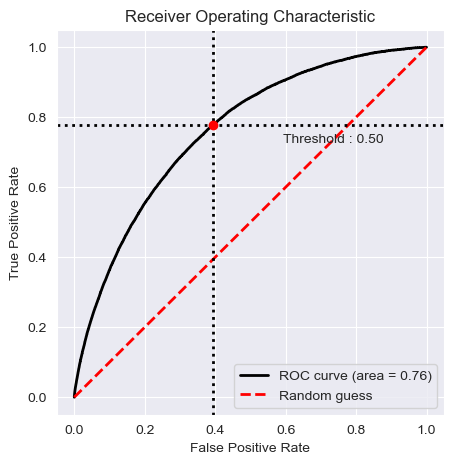

In [9]:
bc_perp = BinaryClassification(y_test, predict_proba_test, labels=["Class 1", "Class 2"])

plt.figure(figsize=(5,5))
bc_perp.plot_roc_curve()
plt.show()

In [10]:
for i in range(0, len(predict_proba_test)):
    if predict_proba_test[i] < 0.5:
        predict_proba_test[i] = 0
    else:
        predict_proba_test[i] = 1

print(precision_score(y_test, predict_proba_test))
print(recall_score(y_test, predict_proba_test))
print(confusion_matrix(y_test, predict_proba_test))

pip_list = !pip list

dict_final_model = {
    'model':pipelines,
    'roc_train':roc_train,
    'roc_test':roc_test,
    'version':1.0,
    'author': 'Alexey Kozlov',
    'list_of_libraries':pip_list,
    'date':'23/10/2023'
}

dill_dump('data/final_model.pkl', dict_final_model)

0.06785191622633156
0.7775272453964674
[[351321 227391]
 [  4736  16552]]


In [ ]:
Критерии оценки:
Пайплайн для подготовки данных и обучения модели написан с помощью
sklearn.pipeline.
Обученный на всём датасете пайплайн сохранён в виде файла в формате
pickle.

In [ ]:
# Pipeline написан с помощью sklearn
# Обучен и сохранен в виде файла в формате pickle

In [8]:
'''Проверим предсказывает ли обученный pipeline из pickle'''

model = dill_load('data/final_model.pkl')

df0 = pd.read_parquet(f'result_data/result.pq')
target = pd.read_csv('train_target.csv')

predict_proba = model['model'].predict(df0)
roc_auc_score(target['flag'], predict_proba)

0.7674799730057711